# Import and check data

In [86]:
import pandas as pd
import requests
from io import StringIO
from google.colab import drive
from google.colab import files
import matplotlib.patches as patches
import matplotlib.pyplot as plt
#drive.mount('/content/drive/MyDrive/dads5001_dataset')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#Upload data from the url
eating_url = "https://drive.google.com/file/d/10DgxfeivkUSetxbVqqPGuq0g2PiMNCuj/view?usp=sharing"
path_df1 ='https://drive.google.com/uc?id=' + eating_url.split('/')[-2] #problem 1: cannot add path -> have to use .split
df_eating_score = pd.read_csv(path_df1)
#df = pd.read_csv(eating_url)

In [88]:
path_df2 = "/content/drive/MyDrive/dads5001_dataset/opendata_living_score.csv"#problem 2: cannot read csv file, became<!DOCTYPE html><html><head><title>Google Drive -> Has to mount gg drive or upload
df_living_score = pd.read_csv(path_df2)

In [89]:
path_df3 = "/content/drive/MyDrive/dads5001_dataset/opendata_median_price_rent.csv"
df_median_price_rent = pd.read_csv(path_df3)

In [90]:
path4 = "/content/drive/MyDrive/dads5001_dataset/teamchadchart.csv" 
df_chadchart = pd.read_csv(path4)

In [91]:
df_eating_score.info() #check data -> all = non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row_number                554 non-null    int64  
 1   subdistrict_id            554 non-null    int64  
 2   subdistrict_name_en       554 non-null    object 
 3   subdistrict_name_th       554 non-null    object 
 4   district_id               554 non-null    int64  
 5   district_name_en          554 non-null    object 
 6   district_name_th          554 non-null    object 
 7   province_id               554 non-null    int64  
 8   province_name_en          554 non-null    object 
 9   province_name_th          554 non-null    object 
 10  eating_daytime            554 non-null    float64
 11  eating_daytime_price      554 non-null    float64
 12  eating_daytime_quality    554 non-null    float64
 13  eating_daytime_variety    554 non-null    float64
 14  eating_nig

In [92]:
df_living_score.info() #check data -> all = non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_number            708 non-null    int64  
 1   subdistrict_id        708 non-null    int64  
 2   subdistrict_name_en   708 non-null    object 
 3   subdistrict_name_th   708 non-null    object 
 4   district_id           708 non-null    int64  
 5   district_name_en      708 non-null    object 
 6   district_name_th      708 non-null    object 
 7   province_id           708 non-null    int64  
 8   province_name_en      708 non-null    object 
 9   province_name_th      708 non-null    object 
 10  walk_leisure          708 non-null    float64
 11  walk_public_service   708 non-null    float64
 12  walk_school           708 non-null    float64
 13  walk_shopping         708 non-null    float64
 14  walk_work             708 non-null    float64
 15  walk_total            7

In [93]:
df_median_price_rent.info() #check data -> all = non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   row_number                    1550 non-null   int64 
 1   transction_year               1550 non-null   int64 
 2   transction_month              1550 non-null   int64 
 3   listing_province_name_th      1550 non-null   object
 4   listing_province_name_en      1550 non-null   object
 5   listing_district_name_th      1550 non-null   object
 6   listing_district_name_en      1550 non-null   object
 7   project_propertytype_name_th  1550 non-null   object
 8   project_propertytype_name_en  1550 non-null   object
 9   total_listing                 1550 non-null   int64 
 10  median_rent_price_sqm         1550 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 133.3+ KB


In [94]:
df_chadchart.info() #check data -> has null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122163 entries, 0 to 122162
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ticket_id     122109 non-null  object
 1   type          68412 non-null   object
 2   organization  122109 non-null  object
 3   comment       121957 non-null  object
 4   coords        122163 non-null  object
 5   photo         122163 non-null  object
 6   address       122109 non-null  object
 7   district      121519 non-null  object
 8   subdistrict   121521 non-null  object
 9   province      122101 non-null  object
 10  timestamp     122163 non-null  object
 11  state         122132 non-null  object
dtypes: object(12)
memory usage: 11.2+ MB


# Filter and clean data

In [95]:
df_eating_score

row_number  subdistrict_id       subdistrict_name_en subdistrict_name_th  \
0           191            3935  PAK KHLONG PHASI CHAROEN    ปากคลองภาษีเจริญ   
1            85            3864                 ANUSAWARI          อนุสาวรีย์   
2           160            4660            NONG BON DAENG          หนองบอนแดง   
3            34            3551   NAI KHLONG BANG PLA KOT      ในคลองบางปลากด   
4           554            1169                MAE PU KHA             แม่ปูคา   
..          ...             ...                       ...                 ...   
549         539            3553   PAK KHLONG BANG PLA KOT     ปากคลองบางปลากด   
550         177            1010                  THA SALA             ท่าศาลา   
551          79            3423                    THA IT              ท่าอิฐ   
552         322            3591                YOK KRABAT           ยกกระบัตร   
553         450            3770              SONG KHANONG             ทรงคนอง   

     district_id   district_name_en district_name_th  province_id  \
0           3928      PHASI CHAROEN        ภาษีเจริญ         3781   
1           3862          BANG KHEN           บางเขน         3781   
2           4654          BAN BUENG          บ้านบึง         4616   
3           3549   PHRA SAMUT CHEDI   พระสมุทรเจดีย์         3498   
4           1164      SAN KAMPHAENG         สันกำแพง         1005   
..           ...                ...              ...          ...   
549         3549   PHRA SAMUT CHEDI   พระสมุทรเจดีย์         3498   
550         1006  MUEANG CHIANG MAI   เมืองเชียงใหม่         1005   
551         3418           PAK KRET         ปากเกร็ด         3372   
552         3586          BAN PHAEO         บ้านแพ้ว         3555   
553         3764          SAM PHRAN          สามพราน         3667   

    province_name_en province_name_th  eating_daytime  eating_daytime_price  \
0            Bangkok    กรุงเทพมหานคร            65.0                  79.0   
1            Bangkok    กรุงเทพมหานคร            62.0                  85.0   
2          Chon Buri           ชลบุรี            38.0                  42.0   
3       Samut Prakan      สมุทรปราการ            52.0                  72.0   
4         Chiang Mai        เชียงใหม่            42.0                  51.0   
..               ...              ...             ...                   ...   
549     Samut Prakan      สมุทรปราการ            68.0                  84.0   
550       Chiang Mai        เชียงใหม่            58.0                  48.0   
551       Nonthaburi          นนทบุรี            70.0                  71.0   
552     Samut Sakhon        สมุทรสาคร            41.0                  58.0   
553    Nakhon Pathom           นครปฐม            54.0                  53.0   

     eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
0                      48.0                    79.0              68.0   
1                      40.0                    69.0              61.0   
2                      39.0                    29.0              32.0   
3                      32.0                    59.0              50.0   
4                      32.0                    47.0              40.0   
..                      ...                     ...               ...   
549                    58.0                    64.0              61.0   
550                    58.0                    76.0              64.0   
551                    67.0                    77.0              73.0   
552                    35.0                    25.0              34.0   
553                    52.0                    59.0              65.0   

     eating_nighttime_price  eating_nighttime_quality  \
0                      81.0                      44.0   
1                      81.0                      35.0   
2                      18.0                      37.0   
3                      64.0                      29.0   
4                      33.0                      48.0   
..                      ...        

In [96]:
#Select only Bangkok rows
df_eating_score_bkk = df_eating_score.loc[df_eating_score["province_name_en"] == "Bangkok", :].reset_index(drop = True) 

#Select id and name of subdistrict and district and eating score of overall, price, quality of service,variety of food both daytime and nighttime
df_eating_score_bkk = df_eating_score_bkk.loc[:,['subdistrict_id', 'subdistrict_name_en','subdistrict_name_th','district_id','district_name_en', 'district_name_th','province_id','province_name_en','province_name_th', 'eating_daytime', 'eating_daytime_price', 'eating_daytime_quality', 'eating_daytime_variety', 'eating_nighttime', 'eating_nighttime_price', 'eating_nighttime_quality','eating_nighttime_variety']]
df_eating_score_bkk

subdistrict_id       subdistrict_name_en subdistrict_name_th  \
0              3935  PAK KHLONG PHASI CHAROEN    ปากคลองภาษีเจริญ   
1              3864                 ANUSAWARI          อนุสาวรีย์   
2              3818                     DUSIT               ดุสิต   
3             20622              BANG NA NUEA          บางนาเหนือ   
4              3841                TALAT PHLU             ตลาดพลู   
..              ...                       ...                 ...   
156            3954         KHLONG SAM PRAWET       คลองสามประเวศ   
157            3873                  LAK SONG             หลักสอง   
158           20627           KHLONG BANG BON          คลองบางบอน   
159            3986                NONG KHAEM             หนองแขม   
160            3794                 BANG CHAN              บางชัน   

     district_id district_name_en district_name_th  province_id  \
0           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
1           3862        BANG KHEN           บางเขน         3781   
2           3817            DUSIT            ดุสิต         3781   
3           3877          BANG NA            บางนา         3781   
4           3839        THON BURI           ธนบุรี         3781   
..           ...              ...              ...          ...   
156         3950      LAT KRABANG        ลาดกระบัง         3781   
157         3869        BANG KHAE            บางแค         3781   
158         3879         BANG BON           บางบอน         3781   
159         3985       NONG KHAEM          หนองแขม         3781   
160         3791    KHLONG SAM WA        คลองสามวา         3781   

    province_name_en province_name_th  eating_daytime  eating_daytime_price  \
0            Bangkok    กรุงเทพมหานคร            65.0                  79.0   
1            Bangkok    กรุงเทพมหานคร            62.0                  85.0   
2            Bangkok    กรุงเทพมหานคร            70.0                  84.0   
3            Bangkok    กรุงเทพมหานคร            68.0                  81.0   
4            Bangkok    กรุงเทพมหานคร            66.0                  81.0   
..               ...              ...             ...                   ...   
156          Bangkok    กรุงเทพมหานคร            60.0                  85.0   
157          Bangkok    กรุงเทพมหานคร            58.0                  84.0   
158          Bangkok    กรุงเทพมหานคร            63.0                  82.0   
159          Bangkok    กรุงเทพมหานคร            58.0                  90.0   
160          Bangkok    กรุงเทพมหานคร            58.0                  85.0   

     eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
0                      48.0                    79.0              68.0   
1                      40.0                    69.0              61.0   
2                      57.0                    77.0              73.0   
3                      52.0                    80.0              72.0   
4                      50.0                    77.0              68.0   
..                      ...                     ...               ...   
156                    39.0                    60.0              56.0   
157                    39.0                    55.0              55.0   
158                    45.0                    69.0              60.0   
159                    33.0                    58.0              57.0   
160                    35.0                    61.0              56.0   

     eating_nighttime_price  eating_nighttime_quality  \
0                      81.0                      44.0   
1                      81.0                      35.0   
2                      72.0                      61.0   
3                      77.0                      51.0   
4                      79.0                      49.0   
..                      ...                       ...   
156                    80.0                      25.0   
157                    78.0                      37.0   
158                    80.0     

In [97]:
df_living_score

row_number  subdistrict_id subdistrict_name_en subdistrict_name_th  \
0           204            4622        BANG PLA SOI         บางปลาสร้อย   
1           138            2861              CHO HO                จอหอ   
2           553            3783         KHLONG TOEI             คลองเตย   
3            99            3604           BANG DUEA            บางเดื่อ   
4           621            2502             SAN SAI             สันทราย   
..          ...             ...                 ...                 ...   
703          20            3889           SI PHRAYA            สี่พระยา   
704         661            4691           NONG PRUE            หนองปรือ   
705         560            2796          NAI MUEANG             ในเมือง   
706           1            3383            SUAN YAI             สวนใหญ่   
707          90            7279          SAM PHRAYA            สามพระยา   

     district_id          district_name_en district_name_th  province_id  \
0           4617          MUEANG CHON BURI      เมืองชลบุรี         4616   
1           2858  MUEANG NAKHON RATCHASIMA  เมืองนครราชสีมา         2857   
2           3782               KHLONG TOEI          คลองเตย         3781   
3           3600       MUEANG PATHUM THANI    เมืองปทุมธานี         3599   
4           2412         MUEANG CHIANG RAI    เมืองเชียงราย         2411   
..           ...                       ...              ...          ...   
703         3886                  BANG RAK           บางรัก         3781   
704         4645               BANG LAMUNG         บางละมุง         4616   
705         2638          MUEANG KHON KAEN     เมืองขอนแก่น         2637   
706         3373         MUEANG NONTHABURI     เมืองนนทบุรี         3372   
707         7272                    CHA-AM             ชะอำ         7226   

      province_name_en province_name_th  ...  access_bus  access_train  \
0            Chon Buri           ชลบุรี  ...         0.0           0.0   
1    Nakhon Ratchasima       นครราชสีมา  ...         0.0           0.0   
2              Bangkok    กรุงเทพมหานคร  ...       100.0          94.0   
3         Pathum Thani         ปทุมธานี  ...        93.0           0.0   
4           Chiang Rai         เชียงราย  ...         0.0           0.0   
..                 ...              ...  ...         ...           ...   
703            Bangkok    กรุงเทพมหานคร  ...       100.0         100.0   
704          Chon Buri           ชลบุรี  ...         0.0           0.0   
705          Khon Kaen          ขอนแก่น  ...         0.0           0.0   
706         Nonthaburi          นนทบุรี  ...       100.0         100.0   
707        Phetchaburi         เพชรบุรี  ...         0.0           0.0   

     access_total  drive_leisure  drive_public_service  drive_school  \
0             0.0           96.0                 100.0         100.0   
1             0.0           80.0                  85.0          81.0   
2            99.0          100.0                  75.0         100.0   
3            37.0          100.0                  96.0          95.0   
4             0.0           56.0                  80.0          90.0   
..            ...            ...                   ...           ...   
703         100.0          100.0                  90.0         100.0   
704           0.0           95.0                  93.0          84.0   
705           0.0           97.0                  98.0          95.0   
706         100.0          100.0                  99.0         100.0   
707           0.0           29.0                  87.0          65.0   

     drive_shopping  drive_work  drive_total  source  
0             100.0       100.0         99.0  baania  
1              95.0        87.0         89.0  baania  
2             100.0        99.0         97.0  baania  
3              97.0        87.0         96.0  baania  
4              88.0        84.0         81.0  baania  
..              ...         ...          ...     ...  
703           100.0        97.0         99.0  baania

In [98]:
#Select only Bangkok rows
df_living_score_bkk = df_living_score.loc[df_living_score["province_name_en"] == "Bangkok", :].reset_index(drop = True)

#Select id and name of subdistrict and district and accessing score of overall of walking, accessing public transportation and driving
df_living_score_bkk = df_living_score_bkk.loc[:,['subdistrict_id', 'subdistrict_name_en','subdistrict_name_th','district_id','district_name_en', 'district_name_th','province_id','province_name_en','province_name_th','walk_total','access_total', 'drive_total']]
df_living_score_bkk

subdistrict_id subdistrict_name_en subdistrict_name_th  district_id  \
0              3783         KHLONG TOEI             คลองเตย         3782   
1             20626   KHLONG BANG PHRAN         คลองบางพราน         3879   
2             20625        BANG BON TAI           บางบอนใต้         3879   
3              3907      KHLONG MAHANAK          คลองมหานาค         3905   
4              3788      KHLONG TON SAI          คลองต้นไทร         3786   
..              ...                 ...                 ...          ...   
156            3961      WANG THONGLANG          วังทองหลาง         3960   
157            3897          PATHUM WAN             ปทุมวัน         3896   
158            3890              SI LOM                สีลม         3886   
159            3885              BANG O              บางอ้อ         3881   
160            3889           SI PHRAYA            สี่พระยา         3886   

         district_name_en   district_name_th  province_id province_name_en  \
0             KHLONG TOEI            คลองเตย         3781          Bangkok   
1                BANG BON             บางบอน         3781          Bangkok   
2                BANG BON             บางบอน         3781          Bangkok   
3    POM PRAP SATTRU PHAI  ป้อมปราบศัตรูพ่าย         3781          Bangkok   
4              KHLONG SAN            คลองสาน         3781          Bangkok   
..                    ...                ...          ...              ...   
156        WANG THONGLANG         วังทองหลาง         3781          Bangkok   
157            PATHUM WAN            ปทุมวัน         3781          Bangkok   
158              BANG RAK             บางรัก         3781          Bangkok   
159            BANG PHLAT            บางพลัด         3781          Bangkok   
160              BANG RAK             บางรัก         3781          Bangkok   

    province_name_th  walk_total  access_total  drive_total  
0      กรุงเทพมหานคร       100.0          99.0         97.0  
1      กรุงเทพมหานคร        97.0          40.0         94.0  
2      กรุงเทพมหานคร        94.0          36.0         85.0  
3      กรุงเทพมหานคร       100.0         100.0         94.0  
4      กรุงเทพมหานคร       100.0         100.0         98.0  
..               ...         ...           ...          ...  
156    กรุงเทพมหานคร        99.0          79.0         93.0  
157    กรุงเทพมหานคร       100.0         100.0         99.0  
158    กรุงเทพมหานคร        99.0          99.0         99.0  
159    กรุงเทพมหานคร       100.0          95.0         92.0  
160    กรุงเทพมหานคร        97.0         100.0         99.0  

[161 rows x 12 columns]

In [99]:
#check no. of district
df_living_score_bkk['district_name_en'].nunique()

50

In [100]:
df_median_price_rent

row_number  transction_year  transction_month listing_province_name_th  \
0           1037             2021                11            กรุงเทพมหานคร   
1            575             2021                10            กรุงเทพมหานคร   
2            143             2019                11            กรุงเทพมหานคร   
3            530             2021                 8            กรุงเทพมหานคร   
4            319             2021                12                  นนทบุรี   
...          ...              ...               ...                      ...   
1545        1463             2019                11                  นนทบุรี   
1546        1061             2021                10            กรุงเทพมหานคร   
1547        1464             2019                 1            กรุงเทพมหานคร   
1548         110             2021                 3            กรุงเทพมหานคร   
1549         719             2020                12                  นนทบุรี   

     listing_province_name_en listing_district_name_th  \
0                     BANGKOK                  บางซื่อ   
1                     BANGKOK                     สาทร   
2                     BANGKOK                  บางกะปิ   
3                     BANGKOK                  สวนหลวง   
4                  NONTHABURI             เมืองนนทบุรี   
...                       ...                      ...   
1545               NONTHABURI                 ปากเกร็ด   
1546                  BANGKOK                  คลองเตย   
1547                  BANGKOK                   บางเขน   
1548                  BANGKOK                  ยานนาวา   
1549               NONTHABURI             เมืองนนทบุรี   

     listing_district_name_en project_propertytype_name_th  \
0                    BANG SUE                        คอนโด   
1                      SATHON                        คอนโด   
2                   BANG KAPI                        คอนโด   
3                PHATTHANAKAN                        คอนโด   
4           MUEANG NONTHABURI                        คอนโด   
...                       ...                          ...   
1545                 PAK KRET                        คอนโด   
1546              KHLONG TOEI                        คอนโด   
1547                BANG KHEN                        คอนโด   
1548                 YAN NAWA                        คอนโด   
1549        MUEANG NONTHABURI                        คอนโด   

     project_propertytype_name_en  total_listing  median_rent_price_sqm  
0                           Condo            118                    336  
1                           Condo            265                    561  
2                           Condo            262                    393  
3                           Condo             24                    268  
4                           Condo            267                    251  
...                           ...            ...                    ...  
1545                        Condo            269                    310  
1546                        Condo           1173                    636  
1547                        Condo             32                    315  
1548                        Condo             83                    362  
1549                        Condo            263                    254  

[1550 rows x 11 columns]

In [101]:
#Filter only in year 2012 amd in Bangkok and only condo type
df_median_price_rent_bkk = df_median_price_rent.loc[(df_median_price_rent["transction_year"] == 2021)&(df_median_price_rent["listing_province_name_en"] == "BANGKOK")& (df_median_price_rent["project_propertytype_name_en"] == "Condo"), ['listing_province_name_th', 'listing_province_name_en', 'listing_district_name_th', 'listing_district_name_en', 'project_propertytype_name_en', 'median_rent_price_sqm' ]].reset_index( drop = True)
df_median_price_rent_bkk

listing_province_name_th listing_province_name_en  \
0              กรุงเทพมหานคร                  BANGKOK   
1              กรุงเทพมหานคร                  BANGKOK   
2              กรุงเทพมหานคร                  BANGKOK   
3              กรุงเทพมหานคร                  BANGKOK   
4              กรุงเทพมหานคร                  BANGKOK   
..                       ...                      ...   
421            กรุงเทพมหานคร                  BANGKOK   
422            กรุงเทพมหานคร                  BANGKOK   
423            กรุงเทพมหานคร                  BANGKOK   
424            กรุงเทพมหานคร                  BANGKOK   
425            กรุงเทพมหานคร                  BANGKOK   

    listing_district_name_th listing_district_name_en  \
0                    บางซื่อ                 BANG SUE   
1                       สาทร                   SATHON   
2                    สวนหลวง             PHATTHANAKAN   
3                    บางกะปิ                BANG KAPI   
4                    คลองสาน               KHLONG SAN   
..                       ...                      ...   
421                บางคอแหลม            BANG KHO LAEM   
422                  คลองเตย              KHLONG TOEI   
423               วังทองหลาง           WANG THONGLANG   
424                  คลองเตย              KHLONG TOEI   
425                  ยานนาวา                 YAN NAWA   

    project_propertytype_name_en  median_rent_price_sqm  
0                          Condo                    336  
1                          Condo                    561  
2                          Condo                    268  
3                          Condo                    348  
4                          Condo                    455  
..                           ...                    ...  
421                        Condo                    393  
422                        Condo                    631  
423                        Condo                    282  
424                        Condo                    636  
425                        Condo                    362  

[426 rows x 6 columns]

In [102]:
#check if any left
df_median_price_rent_bkk['project_propertytype_name_en'].unique()

array(['Condo'], dtype=object)

In [103]:
#check whether data is full year which is not
df_median_price_rent_bkk.groupby(['listing_district_name_en',], dropna = False).size()

listing_district_name_en
BANG KAPI          12
BANG KHAE          12
BANG KHEN          12
BANG KHO LAEM      12
BANG KHUN THIAN     2
BANG NA            12
BANG PHLAT         12
BANG RAK           12
BANG SUE           12
BANGKOK NOI        12
BANGKOK YAI        12
BUENG KUM          10
CHATUCHAK          12
CHOM THONG         12
DIN DAENG          12
HUAI KHWANG        12
KHAN NA YAO         9
KHLONG SAN         12
KHLONG TOEI        12
LAK SI             12
LAT KRABANG        12
LAT PHRAO          12
MIN BURI            1
PATHUM WAN         12
PHASI CHAROEN      12
PHATTHANAKAN       12
PHAYA THAI         12
PHRA KHANONG       12
PRAWET             12
RAT BURANA         10
RATCHATHEWI        12
SAI MAI            10
SATHON             12
SUAN LUANG         12
THON BURI          12
VADHANA            12
WANG THONGLANG     12
YAN NAWA           12
dtype: int64

In [104]:
#check data from mentioned above
df_median_price_rent_bkk1 = df_median_price_rent.loc[(df_median_price_rent["transction_year"] == 2021)&(df_median_price_rent["listing_province_name_en"] == "BANGKOK")& (df_median_price_rent["listing_district_name_en"] == 'MIN BURI')& (df_median_price_rent["project_propertytype_name_en"] == "Condo"), ['listing_province_name_th', 'listing_province_name_en', 'listing_district_name_th', 'listing_district_name_en', 'project_propertytype_name_en', 'median_rent_price_sqm' ]].reset_index( drop = True)
df_median_price_rent_bkk1

listing_province_name_th listing_province_name_en listing_district_name_th  \
0            กรุงเทพมหานคร                  BANGKOK                  มีนบุรี   

  listing_district_name_en project_propertytype_name_en  median_rent_price_sqm  
0                 MIN BURI                        Condo                    228

In [105]:
#check no. of districts -> found that there are only 37 districts. Reasons speculated would be 'no condo' or 'no data'.
df_median_price_rent_bkk['listing_district_name_th'].nunique()

37

In [106]:
#find mean of median rent price in year 2021
mean_median_rent = df_median_price_rent_bkk.groupby(['listing_district_name_en',])['median_rent_price_sqm'].mean().round(2).reset_index()
mean_median_rent = mean_median_rent.rename(columns={"median_rent_price_sqm": "mean_median_rent_price_sqm_district(2021)"})
mean_median_rent

listing_district_name_en  mean_median_rent_price_sqm_district(2021)
0                 BANG KAPI                                     344.50
1                 BANG KHAE                                     275.67
2                 BANG KHEN                                     316.92
3             BANG KHO LAEM                                     388.92
4           BANG KHUN THIAN                                     301.00
5                   BANG NA                                     379.00
6                BANG PHLAT                                     329.17
7                  BANG RAK                                     647.42
8                  BANG SUE                                     353.83
9               BANGKOK NOI                                     324.67
10              BANGKOK YAI                                     322.75
11                BUENG KUM                                     250.50
12                CHATUCHAK                                     450.92
13               CHOM THONG                                     344.92
14                DIN DAENG                                     456.25
15              HUAI KHWANG                                     445.50
16              KHAN NA YAO                                     297.56
17               KHLONG SAN                                     453.00
18              KHLONG TOEI                                     632.50
19                   LAK SI                                     291.83
20              LAT KRABANG                                     244.00
21                LAT PHRAO                                     332.92
22                 MIN BURI                                     228.00
23               PATHUM WAN                                     737.67
24            PHASI CHAROEN                                     301.33
25             PHATTHANAKAN                                     298.08
26               PHAYA THAI                                     500.33
27             PHRA KHANONG                                     445.75
28                   PRAWET                                     242.67
29               RAT BURANA                                     313.90
30              RATCHATHEWI                                     531.25
31                  SAI MAI                                     285.00
32                   SATHON                                     586.00
33               SUAN LUANG                                     345.75
34                THON BURI                                     339.08
35                  VADHANA                                     635.67
36           WANG THONGLANG                                     282.50
37                 YAN NAWA                                     353.92

In [107]:
#merge data 
df_median_price_rent_bkk = df_median_price_rent_bkk.merge(mean_median_rent)
df_median_price_rent_bkk

listing_province_name_th listing_province_name_en  \
0              กรุงเทพมหานคร                  BANGKOK   
1              กรุงเทพมหานคร                  BANGKOK   
2              กรุงเทพมหานคร                  BANGKOK   
3              กรุงเทพมหานคร                  BANGKOK   
4              กรุงเทพมหานคร                  BANGKOK   
..                       ...                      ...   
421            กรุงเทพมหานคร                  BANGKOK   
422            กรุงเทพมหานคร                  BANGKOK   
423            กรุงเทพมหานคร                  BANGKOK   
424            กรุงเทพมหานคร                  BANGKOK   
425            กรุงเทพมหานคร                  BANGKOK   

    listing_district_name_th listing_district_name_en  \
0                    บางซื่อ                 BANG SUE   
1                    บางซื่อ                 BANG SUE   
2                    บางซื่อ                 BANG SUE   
3                    บางซื่อ                 BANG SUE   
4                    บางซื่อ                 BANG SUE   
..                       ...                      ...   
421                    บางนา                  BANG NA   
422                    บางนา                  BANG NA   
423                  มีนบุรี                 MIN BURI   
424              บางขุนเทียน          BANG KHUN THIAN   
425              บางขุนเทียน          BANG KHUN THIAN   

    project_propertytype_name_en  median_rent_price_sqm  \
0                          Condo                    336   
1                          Condo                    344   
2                          Condo                    353   
3                          Condo                    320   
4                          Condo                    354   
..                           ...                    ...   
421                        Condo                    389   
422                        Condo                    383   
423                        Condo                    228   
424                        Condo                    318   
425                        Condo                    284   

     mean_median_rent_price_sqm_district(2021)  
0                                       353.83  
1                                       353.83  
2                                       353.83  
3                                       353.83  
4                                       353.83  
..                                         ...  
421                                     379.00  
422                                     379.00  
423                                     228.00  
424                                     301.00  
425                                     301.00  

[426 rows x 7 columns]

In [108]:
#check data if Bangkok is in difference format -> no
print(df_chadchart["province"].unique())

['กรุงเทพมหานคร' 'นนทบุรี' nan 'สมุทรสาคร' 'นครปฐม' 'สมุทรปราการ'
 'พระนครศรีอยุธยา' 'อุดรธานี' 'ฉะเชิงเทรา' 'ปทุมธานี' 'แพร่' 'อ่างทอง'
 'กาญจนบุรี' 'นครศรีธรรมราช' 'นครนายก' 'สุราษฎร์ธานี' 'เชียงใหม่'
 'บุรีรัมย์' 'จังหวัดกรุงเทพมหานคร' 'ร้อยเอ็ด' 'ภูเก็ต' 'มหาสารคาม'
 'พิษณุโลก' 'นครราชสีมา' 'เพชรบูรณ์' 'สุโขทัย' 'จันทบุรี' 'อุบลราชธานี'
 'อำนาจเจริญ' 'ขอนแก่น' 'สุรินทร์' 'ตราด' 'ชลบุรี' 'ลำปาง' 'ตรัง'
 'สุพรรณบุรี' 'เพชรบุรี' 'สตูล' 'สกลนคร' 'พิจิตร' 'นครสวรรค์' 'ลพบุรี'
 'ชัยนาท' 'อุทัยธานี' 'ศรีสะเกษ' 'ราชบุรี' 'อุตรดิตถ์' 'กาฬสินธุ์'
 'เชียงราย' 'ปราจีนบุรี' 'สงขลา' 'ตาก' 'ยะลา']


In [109]:
#Select only Bangkok rows and use ticket id, types of report, district, sub-district, province, timestamp and state and fill na value -> might use in other occations
df_chadchart_bkk = df_chadchart.loc[df_chadchart['province'] == 'กรุงเทพมหานคร', :].reset_index(drop = True)
df_chadchart_bkk['type'] = df_chadchart_bkk['type'].fillna('อื่นๆ')
df_chadchart_bkk = df_chadchart_bkk.loc[:,['ticket_id','type','district','subdistrict','province','timestamp','state']]
df_chadchart_bkk

ticket_id         type     district  subdistrict       province  \
0       2022-4X9FTB        อื่นๆ       จอมทอง        บางมด  กรุงเทพมหานคร   
1       2022-MBP4RL        อื่นๆ     ห้วยขวาง     ห้วยขวาง  กรุงเทพมหานคร   
2       2022-93YLHD      น้ำท่วม      บางพลัด    บางยี่ขัน  กรุงเทพมหานคร   
3       2022-A87KKL      น้ำท่วม      บางพลัด    บางยี่ขัน  กรุงเทพมหานคร   
4       2022-CFY9LH        อื่นๆ   วังทองหลาง      พลับพลา  กรุงเทพมหานคร   
...             ...          ...          ...          ...            ...   
121503  2021-4ZG4DK        อื่นๆ      บึงกุ่ม    นวลจันทร์  กรุงเทพมหานคร   
121504  2021-GJWY3P        อื่นๆ      ยานนาวา    ช่องนนทรี  กรุงเทพมหานคร   
121505  2021-66JJH8        อื่นๆ        พญาไท     สามเสนใน  กรุงเทพมหานคร   
121506  2021-6ULDXQ        อื่นๆ       สายไหม       สายไหม  กรุงเทพมหานคร   
121507  2021-BK3BQU  ท่อระบายน้ำ  สัมพันธวงศ์  สัมพันธวงศ์  กรุงเทพมหานคร   

                            timestamp          state  
0       2022-08-16 17:49:01.234398+00    รอรับเรื่อง  
1        2022-08-16 17:47:29.49225+00    รอรับเรื่อง  
2       2022-08-16 17:34:04.957596+00    รอรับเรื่อง  
3       2022-08-16 17:32:02.518209+00    รอรับเรื่อง  
4       2022-08-16 17:22:01.970912+00    รอรับเรื่อง  
...                               ...            ...  
121503  2021-09-01 09:33:36.223963+00  ส่งเรื่องแล้ว  
121504  2021-09-01 09:33:34.304352+00      เสร็จสิ้น  
121505  2021-09-01 09:33:32.434846+00      เสร็จสิ้น  
121506  2021-09-01 09:33:30.677133+00      เสร็จสิ้น  
121507  2021-09-01 09:27:37.146614+00      เสร็จสิ้น  

[121508 rows x 7 columns]

In [110]:
#check if any data in district has null
df_chadchart_bkk['district'].isnull().sum()

576

In [111]:
#check the data mentioned above
nan_values = df_chadchart_bkk.loc[df_chadchart_bkk['district'].isna()]

nan_values

ticket_id       type district subdistrict       province  \
74743   2022-EPHK4E      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
82657   2022-98QT9M      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
95601   2022-KQTB7Q      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
95603   2022-EBWVNL      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
95604   2022-4FPBXN      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
...             ...        ...      ...         ...            ...   
121128  2022-6B2UDU      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
121129  2022-7RZZDG      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
121130  2022-BWWQZ7      อื่นๆ      NaN         NaN  กรุงเทพมหานคร   
121307  2021-9U2NJT    น้ำท่วม      NaN         NaN  กรุงเทพมหานคร   
121317  2021-FYJTFP  ความสะอาด      NaN         NaN  กรุงเทพมหานคร   

                            timestamp           state  
74743    2022-06-22 16:42:17.22282+00    ส่งต่อ(ใหม่)  
82657    2022-06-19 14:14:22.83679+00       เสร็จสิ้น  
95601    2022-06-13 03:43:30.92685+00       เสร็จสิ้น  
95603   2022-06-13 03:42:04.934182+00       เสร็จสิ้น  
95604   2022-06-13 03:40:44.333508+00       เสร็จสิ้น  
...                               ...             ...  
121128         2021-09-02 14:00:00+00   ส่งเรื่องแล้ว  
121129         2021-09-02 14:00:00+00   ส่งเรื่องแล้ว  
121130         2021-09-02 14:00:00+00   ส่งเรื่องแล้ว  
121307  2021-10-14 10:45:27.713884+00  กำลังดำเนินการ  
121317  2021-09-03 12:51:09.453003+00       เสร็จสิ้น  

[576 rows x 7 columns]

In [112]:
#Find if still any nan values
nan_values_chadchart = df_chadchart_bkk.isna().sum()

print (nan_values_chadchart)

ticket_id        0
type             0
district       576
subdistrict    575
province         0
timestamp        0
state           21
dtype: int64


In [113]:
# drop all rows with any NaN values
df_chadchart_bkk = df_chadchart_bkk.dropna().reset_index()
df_chadchart_bkk

index    ticket_id         type     district  subdistrict  \
0            0  2022-4X9FTB        อื่นๆ       จอมทอง        บางมด   
1            1  2022-MBP4RL        อื่นๆ     ห้วยขวาง     ห้วยขวาง   
2            2  2022-93YLHD      น้ำท่วม      บางพลัด    บางยี่ขัน   
3            3  2022-A87KKL      น้ำท่วม      บางพลัด    บางยี่ขัน   
4            4  2022-CFY9LH        อื่นๆ   วังทองหลาง      พลับพลา   
...        ...          ...          ...          ...          ...   
120906  121503  2021-4ZG4DK        อื่นๆ      บึงกุ่ม    นวลจันทร์   
120907  121504  2021-GJWY3P        อื่นๆ      ยานนาวา    ช่องนนทรี   
120908  121505  2021-66JJH8        อื่นๆ        พญาไท     สามเสนใน   
120909  121506  2021-6ULDXQ        อื่นๆ       สายไหม       สายไหม   
120910  121507  2021-BK3BQU  ท่อระบายน้ำ  สัมพันธวงศ์  สัมพันธวงศ์   

             province                      timestamp          state  
0       กรุงเทพมหานคร  2022-08-16 17:49:01.234398+00    รอรับเรื่อง  
1       กรุงเทพมหานคร   2022-08-16 17:47:29.49225+00    รอรับเรื่อง  
2       กรุงเทพมหานคร  2022-08-16 17:34:04.957596+00    รอรับเรื่อง  
3       กรุงเทพมหานคร  2022-08-16 17:32:02.518209+00    รอรับเรื่อง  
4       กรุงเทพมหานคร  2022-08-16 17:22:01.970912+00    รอรับเรื่อง  
...               ...                            ...            ...  
120906  กรุงเทพมหานคร  2021-09-01 09:33:36.223963+00  ส่งเรื่องแล้ว  
120907  กรุงเทพมหานคร  2021-09-01 09:33:34.304352+00      เสร็จสิ้น  
120908  กรุงเทพมหานคร  2021-09-01 09:33:32.434846+00      เสร็จสิ้น  
120909  กรุงเทพมหานคร  2021-09-01 09:33:30.677133+00      เสร็จสิ้น  
120910  กรุงเทพมหานคร  2021-09-01 09:27:37.146614+00      เสร็จสิ้น  

[120911 rows x 8 columns]

In [114]:
#Find no. of cases that has been reported from 2021-09-01 to 2022-08-16
count_case_chadchart = df_chadchart_bkk.groupby(['district',])['ticket_id'].count().reset_index()
count_case_chadchart  =count_case_chadchart.rename(columns={"ticket_id": "No.case"})
count_case_chadchart

district  No.case
0             คลองสาน     1551
1           คลองสามวา     2387
2             คลองเตย     3554
3            คันนายาว     1066
4             จตุจักร     7266
5              จอมทอง     2185
6            ดอนเมือง     1999
7              ดินแดง     3003
8               ดุสิต     1444
9            ตลิ่งชัน     1737
10           ทวีวัฒนา     1087
11            ทุ่งครุ     1344
12             ธนบุรี     2010
13         บางกอกน้อย     2385
14         บางกอกใหญ่      987
15            บางกะปิ     4281
16        บางขุนเทียน     3001
17          บางคอแหลม     1451
18            บางซื่อ     2988
19              บางนา     2739
20             บางบอน     1466
21            บางพลัด     2183
22             บางรัก     2455
23             บางเขน     3593
24              บางแค     3659
25            บึงกุ่ม     2200
26            ปทุมวัน     2932
27             ประเวศ     4451
28  ป้อมปราบศัตรูพ่าย     1227
29              พญาไท     2718
30             พระนคร     2012
31            พระโขนง     1977
32          ภาษีเจริญ     1967
33            มีนบุรี     2098
34            ยานนาวา     1966
35            ราชเทวี     3227
36        ราษฎร์บูรณะ     1042
37          ลาดกระบัง     3409
38           ลาดพร้าว     2363
39         วังทองหลาง     2387
40              วัฒนา     3586
41            สวนหลวง     4069
42           สะพานสูง     1856
43        สัมพันธวงศ์      546
44               สาทร     2566
45             สายไหม     2112
46            หนองจอก     1630
47            หนองแขม     1366
48            หลักสี่     1977
49           ห้วยขวาง     3406

In [115]:
#show all after clean
display(df_eating_score_bkk)

display(df_living_score_bkk)

display(df_median_price_rent_bkk)

display(df_chadchart_bkk)

subdistrict_id       subdistrict_name_en subdistrict_name_th  \
0              3935  PAK KHLONG PHASI CHAROEN    ปากคลองภาษีเจริญ   
1              3864                 ANUSAWARI          อนุสาวรีย์   
2              3818                     DUSIT               ดุสิต   
3             20622              BANG NA NUEA          บางนาเหนือ   
4              3841                TALAT PHLU             ตลาดพลู   
..              ...                       ...                 ...   
156            3954         KHLONG SAM PRAWET       คลองสามประเวศ   
157            3873                  LAK SONG             หลักสอง   
158           20627           KHLONG BANG BON          คลองบางบอน   
159            3986                NONG KHAEM             หนองแขม   
160            3794                 BANG CHAN              บางชัน   

     district_id district_name_en district_name_th  province_id  \
0           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
1           3862        BANG KHEN           บางเขน         3781   
2           3817            DUSIT            ดุสิต         3781   
3           3877          BANG NA            บางนา         3781   
4           3839        THON BURI           ธนบุรี         3781   
..           ...              ...              ...          ...   
156         3950      LAT KRABANG        ลาดกระบัง         3781   
157         3869        BANG KHAE            บางแค         3781   
158         3879         BANG BON           บางบอน         3781   
159         3985       NONG KHAEM          หนองแขม         3781   
160         3791    KHLONG SAM WA        คลองสามวา         3781   

    province_name_en province_name_th  eating_daytime  eating_daytime_price  \
0            Bangkok    กรุงเทพมหานคร            65.0                  79.0   
1            Bangkok    กรุงเทพมหานคร            62.0                  85.0   
2            Bangkok    กรุงเทพมหานคร            70.0                  84.0   
3            Bangkok    กรุงเทพมหานคร            68.0                  81.0   
4            Bangkok    กรุงเทพมหานคร            66.0                  81.0   
..               ...              ...             ...                   ...   
156          Bangkok    กรุงเทพมหานคร            60.0                  85.0   
157          Bangkok    กรุงเทพมหานคร            58.0                  84.0   
158          Bangkok    กรุงเทพมหานคร            63.0                  82.0   
159          Bangkok    กรุงเทพมหานคร            58.0                  90.0   
160          Bangkok    กรุงเทพมหานคร            58.0                  85.0   

     eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
0                      48.0                    79.0              68.0   
1                      40.0                    69.0              61.0   
2                      57.0                    77.0              73.0   
3                      52.0                    80.0              72.0   
4                      50.0                    77.0              68.0   
..                      ...                     ...               ...   
156                    39.0                    60.0              56.0   
157                    39.0                    55.0              55.0   
158                    45.0                    69.0              60.0   
159                    33.0                    58.0              57.0   
160                    35.0                    61.0              56.0   

     eating_nighttime_price  eating_nighttime_quality  \
0                      81.0                      44.0   
1                      81.0                      35.0   
2                      72.0                      61.0   
3                      77.0                      51.0   
4                      79.0                      49.0   
..                      ...                       ...   
156                    80.0                      25.0   
157                    78.0                      37.0   
158                    80.0     

subdistrict_id subdistrict_name_en subdistrict_name_th  district_id  \
0              3783         KHLONG TOEI             คลองเตย         3782   
1             20626   KHLONG BANG PHRAN         คลองบางพราน         3879   
2             20625        BANG BON TAI           บางบอนใต้         3879   
3              3907      KHLONG MAHANAK          คลองมหานาค         3905   
4              3788      KHLONG TON SAI          คลองต้นไทร         3786   
..              ...                 ...                 ...          ...   
156            3961      WANG THONGLANG          วังทองหลาง         3960   
157            3897          PATHUM WAN             ปทุมวัน         3896   
158            3890              SI LOM                สีลม         3886   
159            3885              BANG O              บางอ้อ         3881   
160            3889           SI PHRAYA            สี่พระยา         3886   

         district_name_en   district_name_th  province_id province_name_en  \
0             KHLONG TOEI            คลองเตย         3781          Bangkok   
1                BANG BON             บางบอน         3781          Bangkok   
2                BANG BON             บางบอน         3781          Bangkok   
3    POM PRAP SATTRU PHAI  ป้อมปราบศัตรูพ่าย         3781          Bangkok   
4              KHLONG SAN            คลองสาน         3781          Bangkok   
..                    ...                ...          ...              ...   
156        WANG THONGLANG         วังทองหลาง         3781          Bangkok   
157            PATHUM WAN            ปทุมวัน         3781          Bangkok   
158              BANG RAK             บางรัก         3781          Bangkok   
159            BANG PHLAT            บางพลัด         3781          Bangkok   
160              BANG RAK             บางรัก         3781          Bangkok   

    province_name_th  walk_total  access_total  drive_total  
0      กรุงเทพมหานคร       100.0          99.0         97.0  
1      กรุงเทพมหานคร        97.0          40.0         94.0  
2      กรุงเทพมหานคร        94.0          36.0         85.0  
3      กรุงเทพมหานคร       100.0         100.0         94.0  
4      กรุงเทพมหานคร       100.0         100.0         98.0  
..               ...         ...           ...          ...  
156    กรุงเทพมหานคร        99.0          79.0         93.0  
157    กรุงเทพมหานคร       100.0         100.0         99.0  
158    กรุงเทพมหานคร        99.0          99.0         99.0  
159    กรุงเทพมหานคร       100.0          95.0         92.0  
160    กรุงเทพมหานคร        97.0         100.0         99.0  

[161 rows x 12 columns]

listing_province_name_th listing_province_name_en  \
0              กรุงเทพมหานคร                  BANGKOK   
1              กรุงเทพมหานคร                  BANGKOK   
2              กรุงเทพมหานคร                  BANGKOK   
3              กรุงเทพมหานคร                  BANGKOK   
4              กรุงเทพมหานคร                  BANGKOK   
..                       ...                      ...   
421            กรุงเทพมหานคร                  BANGKOK   
422            กรุงเทพมหานคร                  BANGKOK   
423            กรุงเทพมหานคร                  BANGKOK   
424            กรุงเทพมหานคร                  BANGKOK   
425            กรุงเทพมหานคร                  BANGKOK   

    listing_district_name_th listing_district_name_en  \
0                    บางซื่อ                 BANG SUE   
1                    บางซื่อ                 BANG SUE   
2                    บางซื่อ                 BANG SUE   
3                    บางซื่อ                 BANG SUE   
4                    บางซื่อ                 BANG SUE   
..                       ...                      ...   
421                    บางนา                  BANG NA   
422                    บางนา                  BANG NA   
423                  มีนบุรี                 MIN BURI   
424              บางขุนเทียน          BANG KHUN THIAN   
425              บางขุนเทียน          BANG KHUN THIAN   

    project_propertytype_name_en  median_rent_price_sqm  \
0                          Condo                    336   
1                          Condo                    344   
2                          Condo                    353   
3                          Condo                    320   
4                          Condo                    354   
..                           ...                    ...   
421                        Condo                    389   
422                        Condo                    383   
423                        Condo                    228   
424                        Condo                    318   
425                        Condo                    284   

     mean_median_rent_price_sqm_district(2021)  
0                                       353.83  
1                                       353.83  
2                                       353.83  
3                                       353.83  
4                                       353.83  
..                                         ...  
421                                     379.00  
422                                     379.00  
423                                     228.00  
424                                     301.00  
425                                     301.00  

[426 rows x 7 columns]

index    ticket_id         type     district  subdistrict  \
0            0  2022-4X9FTB        อื่นๆ       จอมทอง        บางมด   
1            1  2022-MBP4RL        อื่นๆ     ห้วยขวาง     ห้วยขวาง   
2            2  2022-93YLHD      น้ำท่วม      บางพลัด    บางยี่ขัน   
3            3  2022-A87KKL      น้ำท่วม      บางพลัด    บางยี่ขัน   
4            4  2022-CFY9LH        อื่นๆ   วังทองหลาง      พลับพลา   
...        ...          ...          ...          ...          ...   
120906  121503  2021-4ZG4DK        อื่นๆ      บึงกุ่ม    นวลจันทร์   
120907  121504  2021-GJWY3P        อื่นๆ      ยานนาวา    ช่องนนทรี   
120908  121505  2021-66JJH8        อื่นๆ        พญาไท     สามเสนใน   
120909  121506  2021-6ULDXQ        อื่นๆ       สายไหม       สายไหม   
120910  121507  2021-BK3BQU  ท่อระบายน้ำ  สัมพันธวงศ์  สัมพันธวงศ์   

             province                      timestamp          state  
0       กรุงเทพมหานคร  2022-08-16 17:49:01.234398+00    รอรับเรื่อง  
1       กรุงเทพมหานคร   2022-08-16 17:47:29.49225+00    รอรับเรื่อง  
2       กรุงเทพมหานคร  2022-08-16 17:34:04.957596+00    รอรับเรื่อง  
3       กรุงเทพมหานคร  2022-08-16 17:32:02.518209+00    รอรับเรื่อง  
4       กรุงเทพมหานคร  2022-08-16 17:22:01.970912+00    รอรับเรื่อง  
...               ...                            ...            ...  
120906  กรุงเทพมหานคร  2021-09-01 09:33:36.223963+00  ส่งเรื่องแล้ว  
120907  กรุงเทพมหานคร  2021-09-01 09:33:34.304352+00      เสร็จสิ้น  
120908  กรุงเทพมหานคร  2021-09-01 09:33:32.434846+00      เสร็จสิ้น  
120909  กรุงเทพมหานคร  2021-09-01 09:33:30.677133+00      เสร็จสิ้น  
120910  กรุงเทพมหานคร  2021-09-01 09:27:37.146614+00      เสร็จสิ้น  

[120911 rows x 8 columns]

# Merge and aggregate data

In [116]:
#try merge data
df_all = df_eating_score_bkk.merge(df_living_score_bkk, how = 'left')
df_all 

subdistrict_id       subdistrict_name_en subdistrict_name_th  \
0              3935  PAK KHLONG PHASI CHAROEN    ปากคลองภาษีเจริญ   
1              3864                 ANUSAWARI          อนุสาวรีย์   
2              3818                     DUSIT               ดุสิต   
3             20622              BANG NA NUEA          บางนาเหนือ   
4              3841                TALAT PHLU             ตลาดพลู   
..              ...                       ...                 ...   
156            3954         KHLONG SAM PRAWET       คลองสามประเวศ   
157            3873                  LAK SONG             หลักสอง   
158           20627           KHLONG BANG BON          คลองบางบอน   
159            3986                NONG KHAEM             หนองแขม   
160            3794                 BANG CHAN              บางชัน   

     district_id district_name_en district_name_th  province_id  \
0           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
1           3862        BANG KHEN           บางเขน         3781   
2           3817            DUSIT            ดุสิต         3781   
3           3877          BANG NA            บางนา         3781   
4           3839        THON BURI           ธนบุรี         3781   
..           ...              ...              ...          ...   
156         3950      LAT KRABANG        ลาดกระบัง         3781   
157         3869        BANG KHAE            บางแค         3781   
158         3879         BANG BON           บางบอน         3781   
159         3985       NONG KHAEM          หนองแขม         3781   
160         3791    KHLONG SAM WA        คลองสามวา         3781   

    province_name_en province_name_th  eating_daytime  eating_daytime_price  \
0            Bangkok    กรุงเทพมหานคร            65.0                  79.0   
1            Bangkok    กรุงเทพมหานคร            62.0                  85.0   
2            Bangkok    กรุงเทพมหานคร            70.0                  84.0   
3            Bangkok    กรุงเทพมหานคร            68.0                  81.0   
4            Bangkok    กรุงเทพมหานคร            66.0                  81.0   
..               ...              ...             ...                   ...   
156          Bangkok    กรุงเทพมหานคร            60.0                  85.0   
157          Bangkok    กรุงเทพมหานคร            58.0                  84.0   
158          Bangkok    กรุงเทพมหานคร            63.0                  82.0   
159          Bangkok    กรุงเทพมหานคร            58.0                  90.0   
160          Bangkok    กรุงเทพมหานคร            58.0                  85.0   

     eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
0                      48.0                    79.0              68.0   
1                      40.0                    69.0              61.0   
2                      57.0                    77.0              73.0   
3                      52.0                    80.0              72.0   
4                      50.0                    77.0              68.0   
..                      ...                     ...               ...   
156                    39.0                    60.0              56.0   
157                    39.0                    55.0              55.0   
158                    45.0                    69.0              60.0   
159                    33.0                    58.0              57.0   
160                    35.0                    61.0              56.0   

     eating_nighttime_price  eating_nighttime_quality  \
0                      81.0                      44.0   
1                      81.0                      35.0   
2                      72.0                      61.0   
3                      77.0                      51.0   
4                      79.0                      49.0   
..                      ...                       ...   
156                    80.0                      25.0   
157                    78.0                      37.0   
158                    80.0     

In [117]:
# merge to findout the districts that leftout because have to use in th(chadchart dataset don't hold English name)
df_all_1 = df_eating_score_bkk.merge(df_living_score_bkk, how = 'left').merge(count_case_chadchart, left_on = 'district_name_th', right_on = 'district')
df_all_1

subdistrict_id       subdistrict_name_en subdistrict_name_th  \
0              3935  PAK KHLONG PHASI CHAROEN    ปากคลองภาษีเจริญ   
1              3930               KHUHA SAWAN          คูหาสวรรค์   
2              3933                 BANG WAEK              บางแวก   
3              3932                 BANG DUAN             บางด้วน   
4              3934                   BANG WA             บางหว้า   
..              ...                       ...                 ...   
156            3949                BANG PAKOK            บางปะกอก   
157            3941           BANG PHONGPHANG           บางโพงพาง   
158            3940               CHONG NONSI           ช่องนนทรี   
159            3837                THUNG KHRU             ทุ่งครุ   
160            3838                  BANG MOT               บางมด   

     district_id district_name_en district_name_th  province_id  \
0           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
1           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
2           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
3           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
4           3928    PHASI CHAROEN        ภาษีเจริญ         3781   
..           ...              ...              ...          ...   
156         3947       RAT BURANA      ราษฎร์บูรณะ         3781   
157         3939         YAN NAWA          ยานนาวา         3781   
158         3939         YAN NAWA          ยานนาวา         3781   
159         3836       THUNG KHRU          ทุ่งครุ         3781   
160         3836       THUNG KHRU          ทุ่งครุ         3781   

    province_name_en province_name_th  eating_daytime  ...  \
0            Bangkok    กรุงเทพมหานคร            65.0  ...   
1            Bangkok    กรุงเทพมหานคร            59.0  ...   
2            Bangkok    กรุงเทพมหานคร            66.0  ...   
3            Bangkok    กรุงเทพมหานคร            64.0  ...   
4            Bangkok    กรุงเทพมหานคร            65.0  ...   
..               ...              ...             ...  ...   
156          Bangkok    กรุงเทพมหานคร            61.0  ...   
157          Bangkok    กรุงเทพมหานคร            71.0  ...   
158          Bangkok    กรุงเทพมหานคร            71.0  ...   
159          Bangkok    กรุงเทพมหานคร            62.0  ...   
160          Bangkok    กรุงเทพมหานคร            65.0  ...   

     eating_daytime_variety  eating_nighttime  eating_nighttime_price  \
0                      79.0              68.0                    81.0   
1                      38.0              54.0                    70.0   
2                      68.0              63.0                    82.0   
3                      67.0              60.0                    82.0   
4                      66.0              64.0                    83.0   
..                      ...               ...                     ...   
156                    55.0              59.0                    74.0   
157                    82.0              73.0                    62.0   
158                    92.0              76.0                    57.0   
159                    63.0              61.0                    87.0   
160                    55.0              58.0                    79.0   

     eating_nighttime_quality  eating_nighttime_variety  walk_total  \
0                        44.0                      76.0        96.0   
1                        42.0                      53.0       100.0   
2                        47.0                      64.0        93.0   
3                        43.0                      60.0        78.0   
4                        45.0                      65.0        90.0   
..                        ...                       ...         ...   
156                      48.0                      58.0        94.0   
157                      65.0                      85.0        98.0   
158                      69.0                      91.0        98.0   
159                      39.0          

In [118]:
#At first the no.of districts counted was not equal. After manually calculated = equal #problem 3: don't know why
#df_all_1['district_name_th'].unique()
#df_all_1['district_name_en'].unique()

In [119]:
#show the leftout districts
not_in_df_all = df_all_1[~ df_all_1["district_name_en"].isin(mean_median_rent["listing_district_name_en"])].reset_index(drop = True)
not_in_df_all = not_in_df_all.drop_duplicates(subset = ['district_name_en'])
not_in_df_all[['district_name_en']].reset_index(drop = True)
#not_in_df_all 

district_name_en
0                  DUSIT
1         SAMPHANTHAWONG
2              NONG CHOK
3          KHLONG SAM WA
4         THAWI WATTHANA
5            PHRA NAKHON
6            SAPHAN SUNG
7            TALING CHAN
8             NONG KHAEM
9               BANG BON
10  POM PRAP SATTRU PHAI
11            DON MUEANG
12            THUNG KHRU

In [120]:
#merge all
df_all = df_eating_score_bkk.merge(df_living_score_bkk, how = 'left').merge(mean_median_rent, left_on = 'district_name_en', right_on = 'listing_district_name_en').merge(count_case_chadchart, left_on = 'district_name_th', right_on = 'district')
df_all = df_all.loc[:,['subdistrict_name_en', 'district_name_en', 'province_name_en', 'eating_daytime', 'eating_daytime_price', 'eating_daytime_quality', 'eating_daytime_variety', 'eating_nighttime', 'eating_nighttime_price', 'eating_nighttime_quality', 'eating_nighttime_variety', 'walk_total', 'access_total', 'drive_total', 'mean_median_rent_price_sqm_district(2021)', 'No.case' ] ]
df_all

subdistrict_name_en district_name_en province_name_en  \
0    PAK KHLONG PHASI CHAROEN    PHASI CHAROEN          Bangkok   
1                 KHUHA SAWAN    PHASI CHAROEN          Bangkok   
2                   BANG WAEK    PHASI CHAROEN          Bangkok   
3                   BANG DUAN    PHASI CHAROEN          Bangkok   
4                     BANG WA    PHASI CHAROEN          Bangkok   
..                        ...              ...              ...   
113                   HUA MAK        BANG KAPI          Bangkok   
114                RAT BURANA       RAT BURANA          Bangkok   
115                BANG PAKOK       RAT BURANA          Bangkok   
116           BANG PHONGPHANG         YAN NAWA          Bangkok   
117               CHONG NONSI         YAN NAWA          Bangkok   

     eating_daytime  eating_daytime_price  eating_daytime_quality  \
0              65.0                  79.0                    48.0   
1              59.0                  80.0                    52.0   
2              66.0                  86.0                    51.0   
3              64.0                  86.0                    46.0   
4              65.0                  87.0                    47.0   
..              ...                   ...                     ...   
113            67.0                  80.0                    48.0   
114            64.0                  81.0                    51.0   
115            61.0                  83.0                    47.0   
116            71.0                  73.0                    64.0   
117            71.0                  67.0                    65.0   

     eating_daytime_variety  eating_nighttime  eating_nighttime_price  \
0                      79.0              68.0                    81.0   
1                      38.0              54.0                    70.0   
2                      68.0              63.0                    82.0   
3                      67.0              60.0                    82.0   
4                      66.0              64.0                    83.0   
..                      ...               ...                     ...   
113                    88.0              70.0                    76.0   
114                    65.0              61.0                    72.0   
115                    55.0              59.0                    74.0   
116                    82.0              73.0                    62.0   
117                    92.0              76.0                    57.0   

     eating_nighttime_quality  eating_nighttime_variety  walk_total  \
0                        44.0                      76.0        96.0   
1                        42.0                      53.0       100.0   
2                        47.0                      64.0        93.0   
3                        43.0                      60.0        78.0   
4                        45.0                      65.0        90.0   
..                        ...                       ...         ...   
113                      44.0                      84.0        98.0   
114                      50.0                      62.0       100.0   
115                      48.0                      58.0        94.0   
116                      65.0                      85.0        98.0   
117                      69.0                      91.0        98.0   

     access_total  drive_total  mean_median_rent_price_sqm_district(2021)  \
0            77.0         87.0                                     301.33   
1            82.0         86.0                                     301.33   
2            69.0         81.0                                     301.33   
3            63.0         82.0                                     301.33   
4            58.0         90.0                                     301.33   
..            ...          ...                                        ...   
113          97.0         94.0                                     344.50   
114          54.0         91.0

In [121]:
#check if data = normal -> yes
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   subdistrict_name_en                        118 non-null    object 
 1   district_name_en                           118 non-null    object 
 2   province_name_en                           118 non-null    object 
 3   eating_daytime                             118 non-null    float64
 4   eating_daytime_price                       118 non-null    float64
 5   eating_daytime_quality                     118 non-null    float64
 6   eating_daytime_variety                     118 non-null    float64
 7   eating_nighttime                           118 non-null    float64
 8   eating_nighttime_price                     118 non-null    float64
 9   eating_nighttime_quality                   118 non-null    float64
 10  eating_nighttime_variety  

In [122]:
#Calculate mean of each column by districts
grouped_all = df_all.groupby('district_name_en')['eating_daytime', 'eating_daytime_price', 'eating_daytime_quality', 'eating_daytime_variety', 'eating_nighttime', 'eating_nighttime_price', 'eating_nighttime_quality', 'eating_nighttime_variety', 'walk_total', 'access_total', 'drive_total', 'mean_median_rent_price_sqm_district(2021)','No.case'].mean().round(2).reset_index()
grouped_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


district_name_en  eating_daytime  eating_daytime_price  \
0         BANG KAPI           66.50                 80.50   
1         BANG KHAE           60.50                 83.00   
2         BANG KHEN           61.00                 84.50   
3     BANG KHO LAEM           65.33                 71.67   
4   BANG KHUN THIAN           60.00                 80.00   
5           BANG NA           68.50                 81.00   
6        BANG PHLAT           69.00                 85.25   
7          BANG RAK           70.60                 63.40   
8          BANG SUE           68.50                 86.00   
9       BANGKOK NOI           70.00                 87.00   
10      BANGKOK YAI           60.50                 78.50   
11        BUENG KUM           65.00                 82.33   
12        CHATUCHAK           66.60                 80.00   
13       CHOM THONG           69.80                 85.20   
14        DIN DAENG           65.00                 76.00   
15      HUAI KHWANG           66.33                 72.33   
16      KHAN NA YAO           65.00                 82.00   
17       KHLONG SAN           66.75                 68.25   
18      KHLONG TOEI           71.00                 59.33   
19           LAK SI           63.50                 84.50   
20      LAT KRABANG           53.33                 83.50   
21        LAT PHRAO           68.00                 79.50   
22         MIN BURI           52.50                 79.00   
23       PATHUM WAN           71.50                 59.00   
24    PHASI CHAROEN           64.00                 82.86   
25       PHAYA THAI           75.00                 73.00   
26     PHRA KHANONG           67.00                 82.33   
27           PRAWET           63.00                 79.67   
28       RAT BURANA           62.50                 82.00   
29      RATCHATHEWI           69.25                 62.75   
30          SAI MAI           58.33                 84.67   
31           SATHON           69.67                 67.00   
32       SUAN LUANG           65.50                 78.00   
33        THON BURI           64.17                 77.50   
34          VADHANA           72.00                 61.33   
35   WANG THONGLANG           65.75                 75.50   
36         YAN NAWA           71.00                 70.00   

    eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
0                    47.00                   85.50             69.00   
1                    45.00                   55.75             57.25   
2                    38.50                   69.00             60.50   
3                    55.00                   78.00             71.67   
4                    45.00                   58.50             56.50   
5                    55.50                   75.00             71.00   
6                    55.00                   71.75             67.25   
7                    64.20                   98.00             79.00   
8                    54.00                   68.50             70.50   
9                    54.00                   76.00             66.25   
10                   47.00                   61.50             61.00   
11                   45.00                   78.67             66.00   
12                   49.80                   80.00             69.60   
13                   61.40                   62.00             64.60   
14                   48.00                   87.00             73.00   
15                   53.00                   86.00             72.33   
16                   46.50                   76.00             64.50   
17                   58.00                   83.25             71.75   
18                   68.00                   97.67             78.67   
19                   46.50                   65.50             63.50   
20                   31.17                   49.67             48.33   
21                   53.50                   81.00             68.00   
22                   28.00  

In [123]:
#problem 4: cannot rank each of them, so combine them by using mean
#Calculate mean of overall eating and traveling and both
grouped_all['mean_eating'] = grouped_all.loc[:, ['eating_daytime', 'eating_daytime_price', 'eating_daytime_quality', 'eating_daytime_variety', 'eating_nighttime', 'eating_nighttime_price', 'eating_nighttime_quality', 'eating_nighttime_variety']].mean(axis=1).round(2)
grouped_all['mean_travel'] = grouped_all.loc[:, ['walk_total', 'access_total', 'drive_total']].mean(axis=1).round(2)
grouped_all['mean_all'] =   grouped_all.loc[:, ['mean_eating', 'mean_travel']].mean(axis=1).round(2)

#problem 5: data is not normalize -> hard to rank
#Normalize data
normalized = grouped_all.loc[:,[ 'mean_median_rent_price_sqm_district(2021)','No.case', 'mean_all']].apply(lambda x: (x-x.min())/ (x.max()-x.min()), axis=0)
normalized_2 = normalized.loc[:,['mean_median_rent_price_sqm_district(2021)','No.case']].apply(lambda x: 1-x, axis=0) #problem 6: both price and no. of cases needs to be low -> transform by 1-x 
normalized.loc[:,['mean_median_rent_price_sqm_district(2021)','No.case']] = normalized_2.loc[:,[ 'mean_median_rent_price_sqm_district(2021)','No.case']]
normalized['normalized_all'] = normalized.loc[:, ['mean_median_rent_price_sqm_district(2021)', 'No.case', 'mean_all']].mean(axis=1).round(4)
normalized

#Concat to the original data and sort values
grouped_all = pd.concat([grouped_all,normalized['normalized_all']],axis = 1) #problem 7: if run multiple times, it will cause error because the column has the same name
grouped_all['normalized_all'] = grouped_all.loc[:,['normalized_all']].apply(lambda x: x*100, axis=0)
grouped_all.sort_values(by = ['normalized_all'], ascending = False, inplace = True)
grouped_all.reset_index(drop = True)


district_name_en  eating_daytime  eating_daytime_price  \
0       BANGKOK YAI           60.50                 78.50   
1         THON BURI           64.17                 77.50   
2     BANG KHO LAEM           65.33                 71.67   
3        KHLONG SAN           66.75                 68.25   
4    WANG THONGLANG           65.75                 75.50   
5          BANG SUE           68.50                 86.00   
6        BANG PHLAT           69.00                 85.25   
7        RAT BURANA           62.50                 82.00   
8          YAN NAWA           71.00                 70.00   
9       KHAN NA YAO           65.00                 82.00   
10      BANGKOK NOI           70.00                 87.00   
11        BUENG KUM           65.00                 82.33   
12     PHRA KHANONG           67.00                 82.33   
13       CHOM THONG           69.80                 85.20   
14    PHASI CHAROEN           64.00                 82.86   
15       PHAYA THAI           75.00                 73.00   
16          BANG NA           68.50                 81.00   
17           LAK SI           63.50                 84.50   
18        LAT PHRAO           68.00                 79.50   
19        DIN DAENG           65.00                 76.00   
20      RATCHATHEWI           69.25                 62.75   
21           SATHON           69.67                 67.00   
22      HUAI KHWANG           66.33                 72.33   
23       SUAN LUANG           65.50                 78.00   
24        BANG KAPI           66.50                 80.50   
25         BANG RAK           70.60                 63.40   
26         MIN BURI           52.50                 79.00   
27          SAI MAI           58.33                 84.67   
28           PRAWET           63.00                 79.67   
29          VADHANA           72.00                 61.33   
30      KHLONG TOEI           71.00                 59.33   
31       PATHUM WAN           71.50                 59.00   
32        BANG KHEN           61.00                 84.50   
33        BANG KHAE           60.50                 83.00   
34      LAT KRABANG           53.33                 83.50   
35  BANG KHUN THIAN           60.00                 80.00   
36        CHATUCHAK           66.60                 80.00   

    eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
0                    47.00                   61.50             61.00   
1                    49.33                   74.17             69.50   
2                    55.00                   78.00             71.67   
3                    58.00                   83.25             71.75   
4                    49.50                   85.25             69.25   
5                    54.00                   68.50             70.50   
6                    55.00                   71.75             67.25   
7                    49.00                   60.00             60.00   
8                    64.50                   87.00             74.50   
9                    46.50                   76.00             64.50   
10                   54.00                   76.00             66.25   
11                   45.00                   78.67             66.00   
12                   47.67                   82.33             73.33   
13                   61.40                   62.00             64.60   
14                   49.14                   64.57             61.71   
15                   67.00                   95.00             79.00   
16                   55.50                   75.00             71.00   
17                   46.50                   65.50             63.50   
18                   53.50                   81.00             68.00   
19                   48.00                   87.00             73.00   
20                   62.50                   95.75             78.50   
21                   59.67                   96.67             78.33   
22                   53.00  

In [124]:
grouped_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 10 to 12
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   district_name_en                           37 non-null     object 
 1   eating_daytime                             37 non-null     float64
 2   eating_daytime_price                       37 non-null     float64
 3   eating_daytime_quality                     37 non-null     float64
 4   eating_daytime_variety                     37 non-null     float64
 5   eating_nighttime                           37 non-null     float64
 6   eating_nighttime_price                     37 non-null     float64
 7   eating_nighttime_quality                   37 non-null     float64
 8   eating_nighttime_variety                   37 non-null     float64
 9   walk_total                                 37 non-null     float64
 10  access_total               

# Visualization

In [125]:
#to visualize from left to right(low to high)
grouped_all_vi = grouped_all.sort_values(by = ['normalized_all'], ascending = True).reset_index(drop= True) #problem 8 : data not in ascending -> create a new variable
# Draw plot



fig, ax = plt.subplots(figsize=(30,19), facecolor='white', dpi= 400)
ax.vlines(x=grouped_all_vi.index, ymin=0, ymax=grouped_all_vi.normalized_all, color='firebrick', alpha=0.8, linewidth=18)

# Annotate Text
for i, cty in enumerate(grouped_all_vi.normalized_all):
    ax.text(i, cty+1, round(cty, 1), horizontalalignment='center') #problem 9 : text not arraged -> have to try increasing value 


# Title, Label, Ticks and Ylim
ax.set_title('District ranking', fontdict={'size':22})
ax.set_ylabel('Score', fontsize=22)
plt.xticks(grouped_all_vi.index, grouped_all_vi.district_name_en.str.upper(), rotation=65, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.764, -0.001), width=.11, height=.125, alpha=.125, facecolor='lime', transform=fig.transFigure) #problem 10 : rectangles not proper -> adjust coordinates 
p2 = patches.Rectangle((.125, -0.001), width=.11, height=.125, alpha=.125, facecolor='crimson', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()
#plt.savefig("District_ranking.png")
#files.download("District_ranking.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [126]:
#check quality of data -> looks ok
grouped_all_vi .loc[(grouped_all_vi ['district_name_en'] == 'BANGKOK YAI')|(grouped_all_vi ['district_name_en'] == 'THON BURI') | (grouped_all_vi ['district_name_en'] == 'BANG KHO LAEM') | (grouped_all_vi ['district_name_en'] == 'KHLONG SAN') | (grouped_all_vi ['district_name_en'] == 'WANG THONGLANG'),:]

district_name_en  eating_daytime  eating_daytime_price  \
32   WANG THONGLANG           65.75                 75.50   
33       KHLONG SAN           66.75                 68.25   
34    BANG KHO LAEM           65.33                 71.67   
35        THON BURI           64.17                 77.50   
36      BANGKOK YAI           60.50                 78.50   

    eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
32                   49.50                   85.25             69.25   
33                   58.00                   83.25             71.75   
34                   55.00                   78.00             71.67   
35                   49.33                   74.17             69.50   
36                   47.00                   61.50             61.00   

    eating_nighttime_price  eating_nighttime_quality  \
32                   74.25                     45.25   
33                   68.00                     57.75   
34                   63.00                     56.33   
35                   76.17                     50.33   
36                   81.50                     43.00   

    eating_nighttime_variety  walk_total  access_total  drive_total  \
32                     82.25       98.00         69.50        93.50   
33                     82.50       99.25         99.75        96.75   
34                     87.00       97.67         91.00        95.00   
35                     78.67       99.17         99.33        97.00   
36                     61.50      100.00         97.00        91.50   

    mean_median_rent_price_sqm_district(2021)  No.case  mean_eating  \
32                                     282.50   2387.0        68.38   
33                                     453.00   1551.0        69.53   
34                                     388.92   1451.0        68.50   
35                                     339.08   2010.0        67.48   
36                                     322.75    987.0        61.81   

    mean_travel  mean_all  normalized_all  
32        87.00     77.69           77.04  
33        98.58     84.06           78.31  
34        94.56     81.53           79.86  
35        98.50     82.99           81.98  
36        96.17     78.99           83.46

In [127]:
#check quality of data -> looks ok
grouped_all_vi .loc[(grouped_all_vi ['district_name_en'] == 'CHATUCHAK') | (grouped_all_vi ['district_name_en'] == 'BANG KHUN THIAN') | (grouped_all_vi ['district_name_en'] == 'LAT KRABANG'),:]

district_name_en  eating_daytime  eating_daytime_price  \
0        CHATUCHAK           66.60                  80.0   
1  BANG KHUN THIAN           60.00                  80.0   
2      LAT KRABANG           53.33                  83.5   

   eating_daytime_quality  eating_daytime_variety  eating_nighttime  \
0                   49.80                   80.00             69.60   
1                   45.00                   58.50             56.50   
2                   31.17                   49.67             48.33   

   eating_nighttime_price  eating_nighttime_quality  eating_nighttime_variety  \
0                   79.40                      47.2                      78.8   
1                   74.00                      39.0                      58.0   
2                   80.33                      22.5                      48.0   

   walk_total  access_total  drive_total  \
0       96.20         71.80        94.00   
1       83.00         28.50        76.00   
2       90.17         42.17        75.17   

   mean_median_rent_price_sqm_district(2021)  No.case  mean_eating  \
0                                     450.92   7266.0        68.92   
1                                     301.00   3001.0        58.88   
2                                     244.00   3409.0        52.10   

   mean_travel  mean_all  normalized_all  
0        87.33     78.12           40.66  
1        62.50     60.69           51.26  
2        69.17     60.64           52.76

In [128]:
#assign top 5 
top_5_all = grouped_all.loc[:,['district_name_en','normalized_all']].sort_values(by = 'normalized_all' ,ascending = False).reset_index(drop = True) ##problem 11 : cannot select the top 5 rows -> use iloc 
top_5_all = top_5_all.iloc[:5,:]
display(top_5_all)
#assign bottom 5 
bottom_5_all = grouped_all_vi.loc[:4,['district_name_en','normalized_all']]
display(bottom_5_all)
#top_5_all

district_name_en  normalized_all
0      BANGKOK YAI           83.46
1        THON BURI           81.98
2    BANG KHO LAEM           79.86
3       KHLONG SAN           78.31
4   WANG THONGLANG           77.04

district_name_en  normalized_all
0        CHATUCHAK           40.66
1  BANG KHUN THIAN           51.26
2      LAT KRABANG           52.76
3        BANG KHAE           54.34
4        BANG KHEN           56.16

In [129]:
top_5_eat =grouped_all.loc[:,['district_name_en','mean_eating',]].sort_values('mean_eating', ascending = False).reset_index(drop = True)
top_5_eat = top_5_eat.iloc[:5,:] #not sure why select row and it kind of skip so use iloc
display(top_5_eat)
bottom_5_eat = grouped_all.loc[:,['district_name_en','mean_eating']].sort_values('mean_eating', ascending = True).reset_index(drop = True)
bottom_5_eat = bottom_5_eat.iloc[:5,:] 
display(bottom_5_eat)



district_name_en  mean_eating
0       PHAYA THAI        77.19
1          VADHANA        75.83
2       PATHUM WAN        75.66
3         BANG RAK        74.90
4      KHLONG TOEI        74.83

district_name_en  mean_eating
0      LAT KRABANG        52.10
1         MIN BURI        53.69
2  BANG KHUN THIAN        58.88
3        BANG KHAE        59.72
4          SAI MAI        59.79

In [130]:
top_5_travel = grouped_all.loc[:,['district_name_en','mean_travel']].sort_values('mean_travel', ascending = False).reset_index(drop = True)
top_5_travel = top_5_travel.iloc[:5,:] #not sure why select row and it kind of skip so use iloc
display(top_5_travel)
bottom_5_travel = grouped_all.loc[:,['district_name_en','mean_travel']].sort_values('mean_travel', ascending = True).reset_index(drop = True)
bottom_5_travel = bottom_5_travel.iloc[:5,:] 
display(bottom_5_travel)

district_name_en  mean_travel
0         BANG RAK        99.00
1      RATCHATHEWI        98.92
2       PATHUM WAN        98.83
3       KHLONG SAN        98.58
4        THON BURI        98.50

district_name_en  mean_travel
0  BANG KHUN THIAN        62.50
1          SAI MAI        67.55
2      LAT KRABANG        69.17
3         MIN BURI        69.33
4        BANG KHAE        69.50

In [131]:
top_5_price = grouped_all.loc[:,['district_name_en','mean_median_rent_price_sqm_district(2021)']].sort_values('mean_median_rent_price_sqm_district(2021)', ascending = False).reset_index(drop = True)
top_5_price = top_5_price.iloc[:5,:] #not sure why select row and it kind of skip so use iloc
display(top_5_price)
bottom_5_price = grouped_all.loc[:,['district_name_en','mean_median_rent_price_sqm_district(2021)']].sort_values('mean_median_rent_price_sqm_district(2021)', ascending = True).reset_index(drop = True)
bottom_5_price = bottom_5_price.iloc[:5,:] 
display(bottom_5_price)

district_name_en  mean_median_rent_price_sqm_district(2021)
0       PATHUM WAN                                     737.67
1         BANG RAK                                     647.42
2          VADHANA                                     635.67
3      KHLONG TOEI                                     632.50
4           SATHON                                     586.00

district_name_en  mean_median_rent_price_sqm_district(2021)
0         MIN BURI                                     228.00
1           PRAWET                                     242.67
2      LAT KRABANG                                     244.00
3        BUENG KUM                                     250.50
4        BANG KHAE                                     275.67

Text(0.5, 0, 'Score')

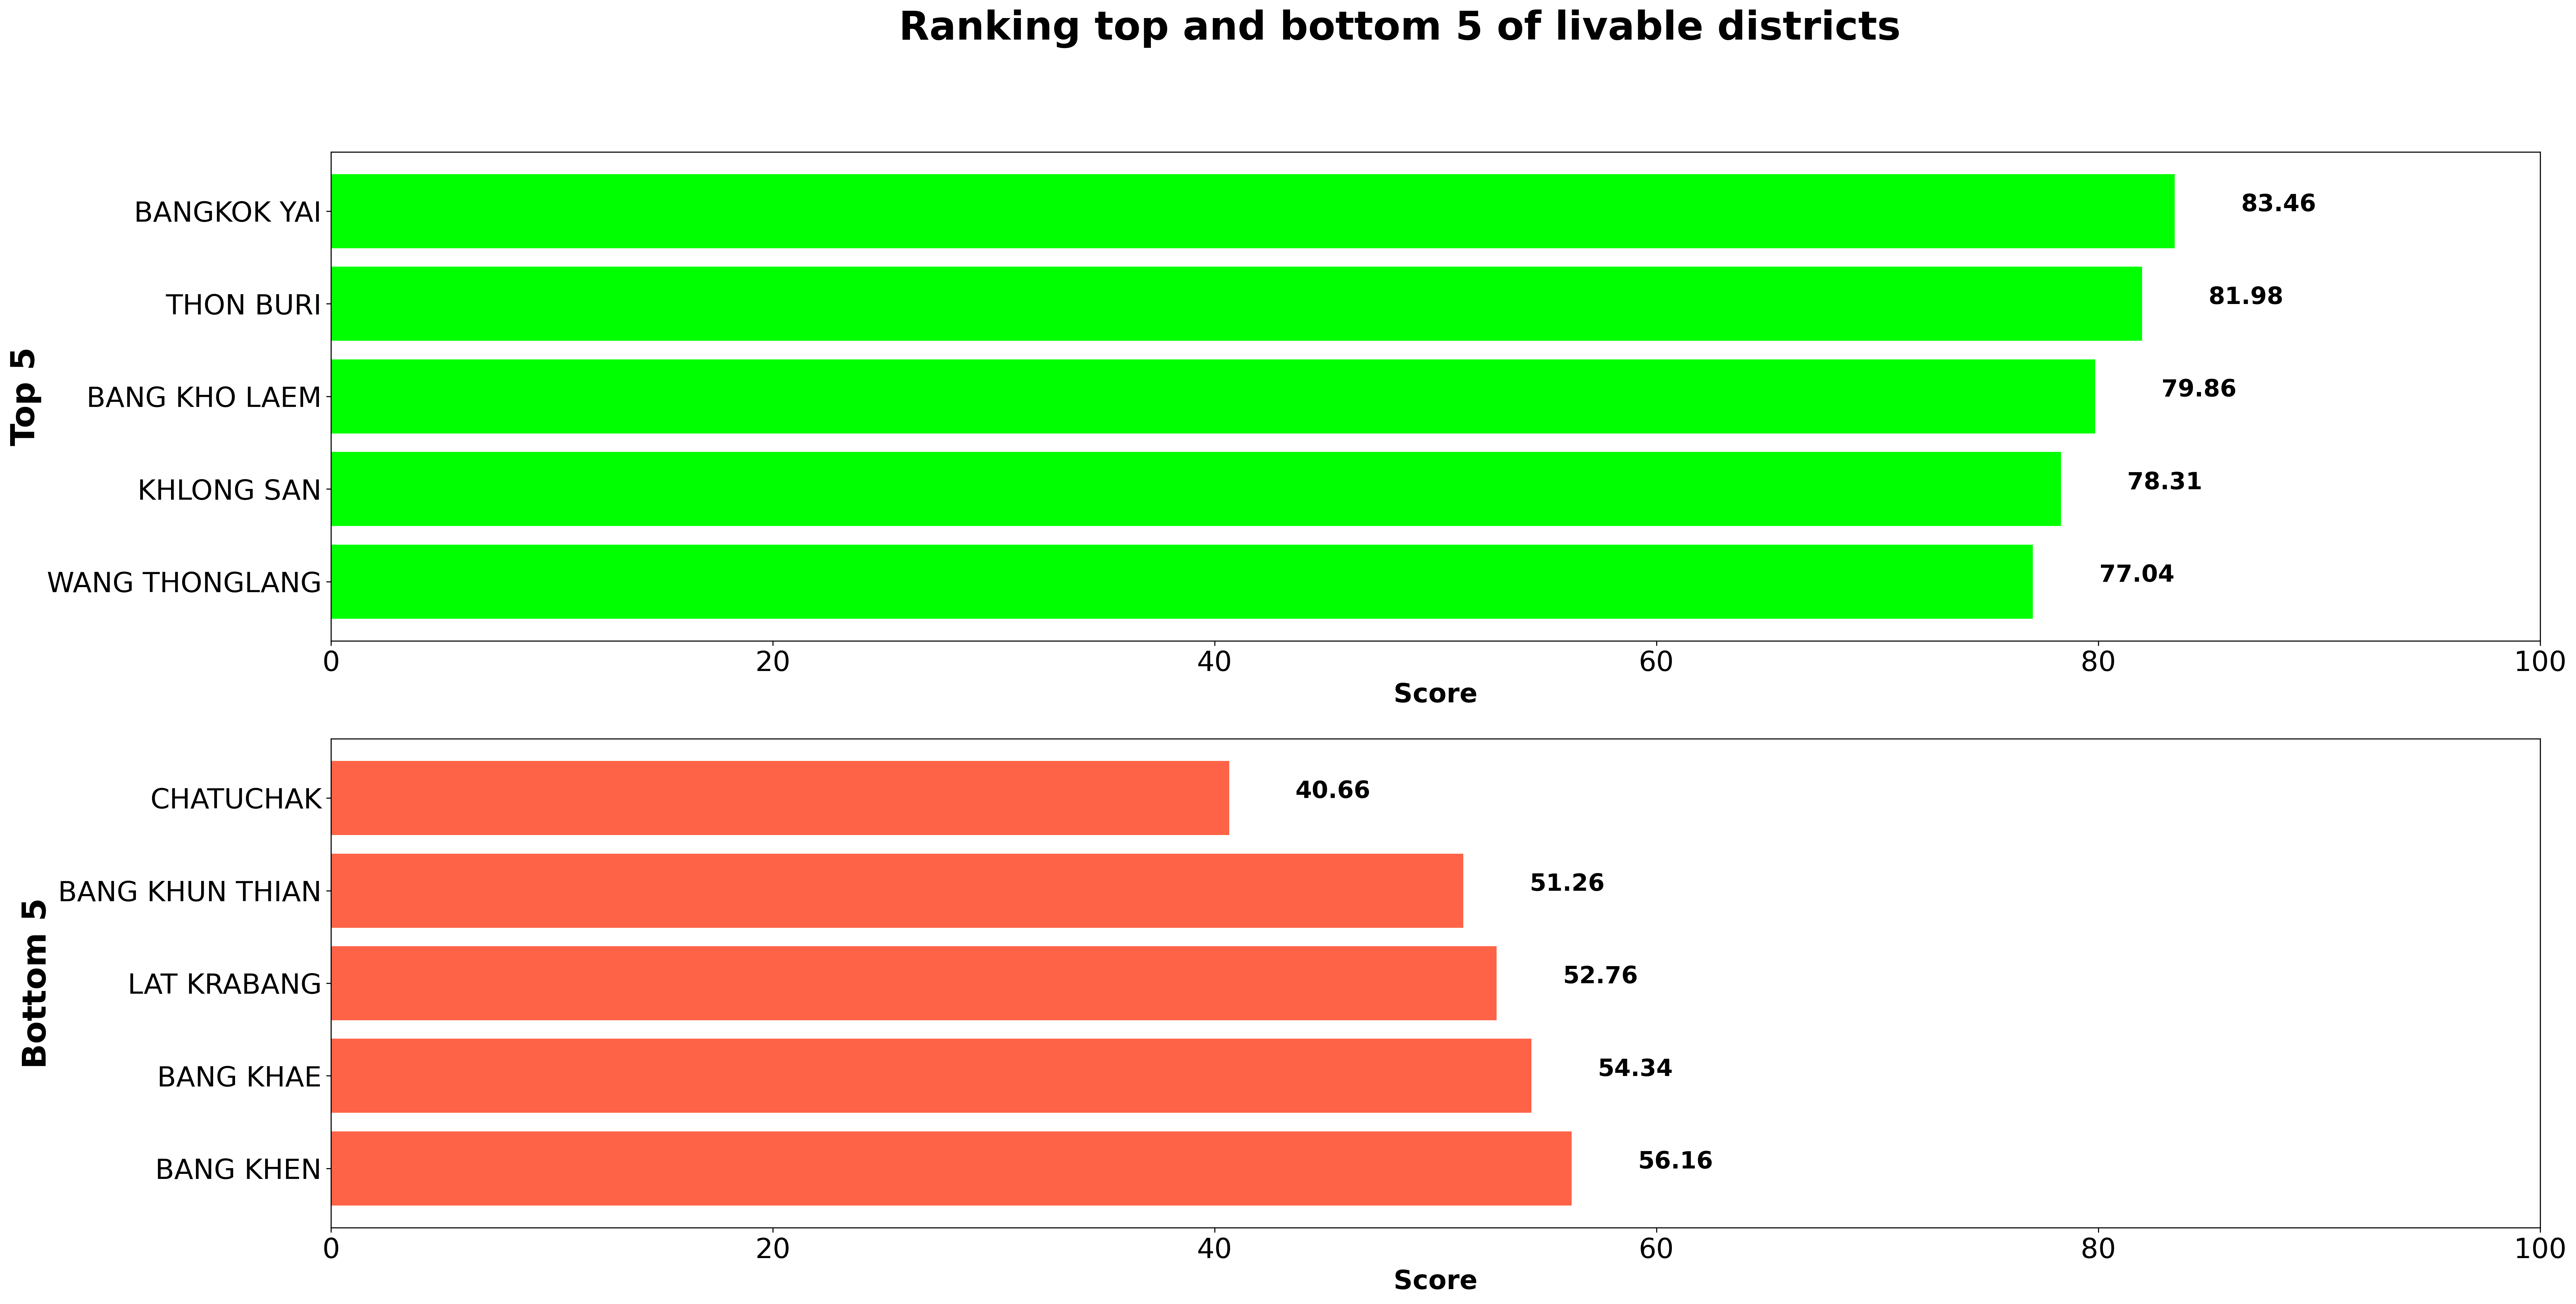

In [132]:
#visualize
top_5_all = top_5_all.iloc[:5,:].sort_values(by = 'normalized_all' ,ascending = True).reset_index(drop = True)
fig, axs = plt.subplots(2, figsize = (30,15), dpi = 300)
fig.suptitle('Ranking top and bottom 5 of livable districts', fontsize = 30, fontweight='bold')
axs[0].set_xticklabels([0,20,40,60,80,100],fontsize=21) ##problem 12 : max value of data not equal -> set to be equal
axs[0].set_yticklabels(top_5_all['district_name_en'],fontsize=21)
axs[0].barh(top_5_all['district_name_en'], top_5_all['normalized_all'], color = 'lime')
axs[0].set_xlim([0, 100])#problem 12 : max value of data not equal -> set to be equal
for i, v in enumerate(top_5_all['normalized_all'].round(2)):
    axs[0].text(v +3 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[0].set_ylabel('Top 5', fontsize=25, fontweight='bold')
axs[0].set_xlabel('Score', fontsize=20, fontweight='bold')

bottom_5_all = bottom_5_all.iloc[:5,:].sort_values(by = 'normalized_all' ,ascending = False).reset_index(drop = True)
axs[1].barh(bottom_5_all['district_name_en'], bottom_5_all['normalized_all'])
axs[1].set_xlim([0, 100])
axs[1].set_xticklabels([0,20,40,60,80,100],fontsize=21)
axs[1].set_yticklabels(bottom_5_all['district_name_en'],fontsize=21)
axs[1].barh(bottom_5_all['district_name_en'], bottom_5_all['normalized_all'], color = 'tomato')
axs[1].set_xlim([0, 100])
for i, v in enumerate(bottom_5_all['normalized_all'].round(2)):
    axs[1].text(v +3 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[1].set_ylabel('Bottom 5', fontsize=25, fontweight='bold')
axs[1].set_xlabel('Score', fontsize=20, fontweight='bold')


#plt.savefig("top_livable.png")
#files.download("top_livable.png") 

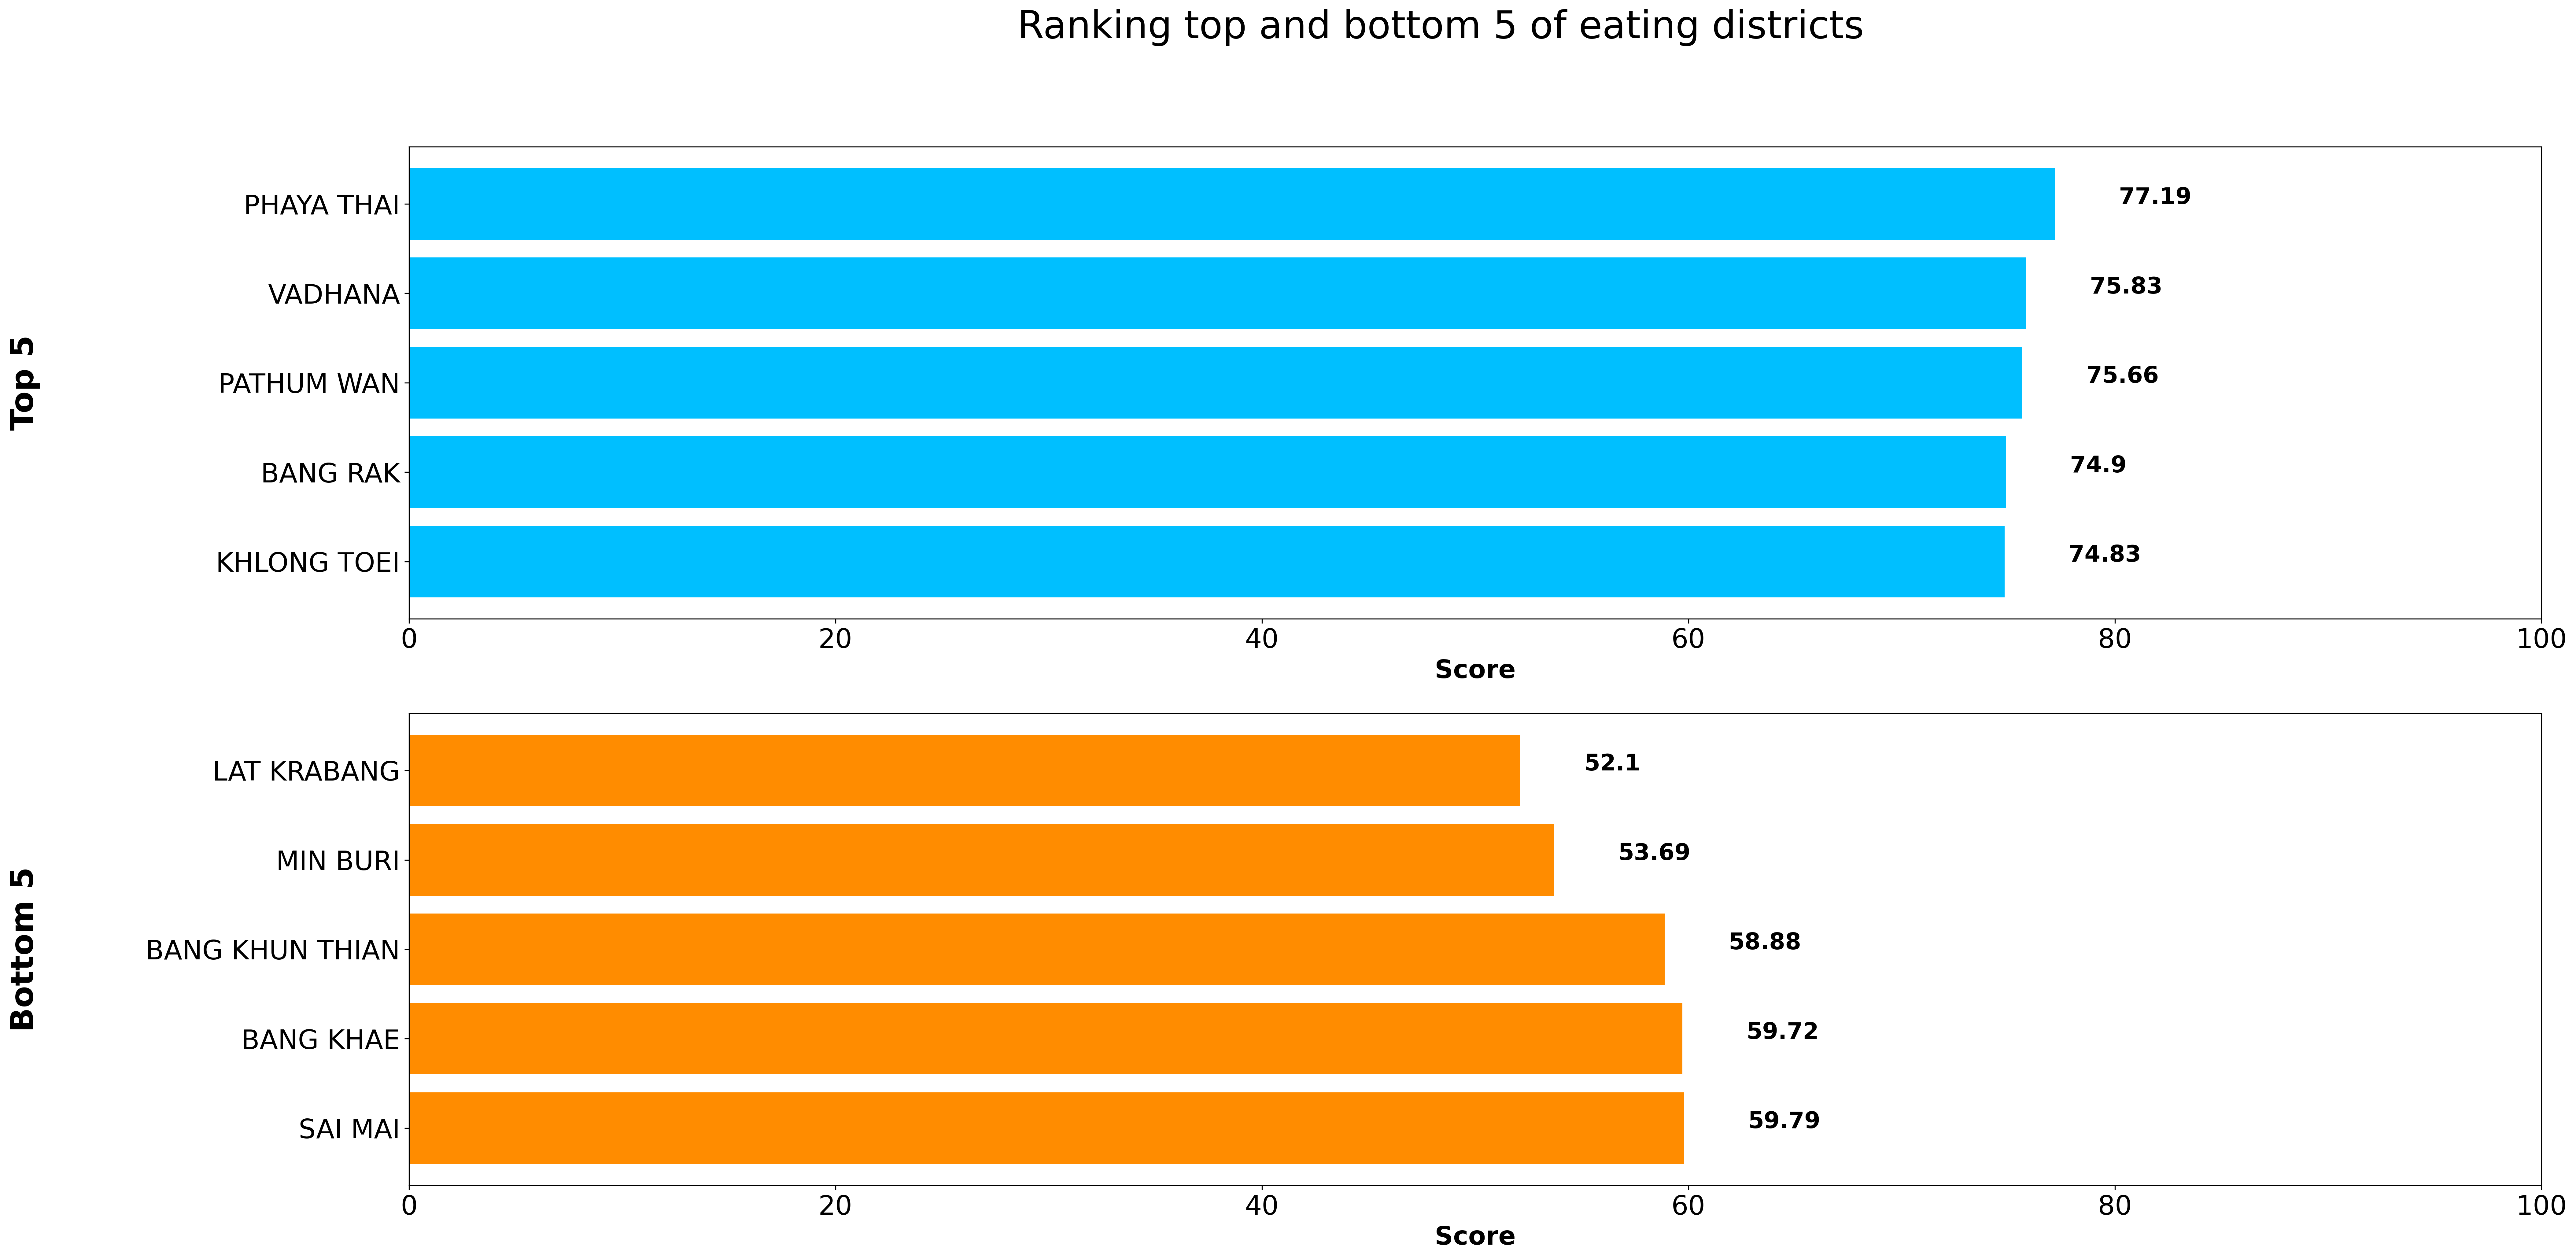

In [133]:
top_5_eat = top_5_eat.iloc[:5,:].sort_values(by = 'mean_eating' ,ascending = True).reset_index(drop = True)
fig, axs = plt.subplots(2, figsize = (30,15), dpi = 300)
fig.suptitle('Ranking top and bottom 5 of eating districts', fontsize = 30)
axs[0].set_xticklabels([0,20,40,60,80,100],fontsize=21)
axs[0].set_yticklabels(top_5_eat['district_name_en'],fontsize=21)
axs[0].barh(top_5_eat['district_name_en'], top_5_eat['mean_eating'], color = 'deepskyblue')
axs[0].set_xlim([0, 100])
for i, v in enumerate(top_5_eat['mean_eating'].round(2)):
    axs[0].text(v +3 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[0].set_ylabel('Top 5', fontsize=25, fontweight='bold')
axs[0].set_xlabel('Score', fontsize=20, fontweight='bold')
axs[0].yaxis.set_label_coords(-0.173, 0.5)


bottom_5_eat = bottom_5_eat.iloc[:5,:].sort_values(by = 'mean_eating' ,ascending = False).reset_index(drop = True)
axs[1].barh(bottom_5_eat['district_name_en'], bottom_5_eat['mean_eating'])
axs[1].set_xlim([0, 100])
axs[1].set_xticklabels([0,20,40,60,80,100],fontsize=21)
axs[1].set_yticklabels(bottom_5_eat['district_name_en'],fontsize=21)
axs[1].barh(bottom_5_eat['district_name_en'], bottom_5_eat['mean_eating'], color = 'darkorange')
axs[1].set_xlim([0, 100])
for i, v in enumerate(bottom_5_eat['mean_eating'].round(2)):
    axs[1].text(v +3 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[1].set_ylabel('Bottom 5', fontsize=25, fontweight='bold')
axs[1].set_xlabel('Score', fontsize=20, fontweight='bold')
axs[1].yaxis.set_label_coords(-0.173, 0.5)


#plt.savefig("top_eating.png")
#files.download("top_eating.png") 


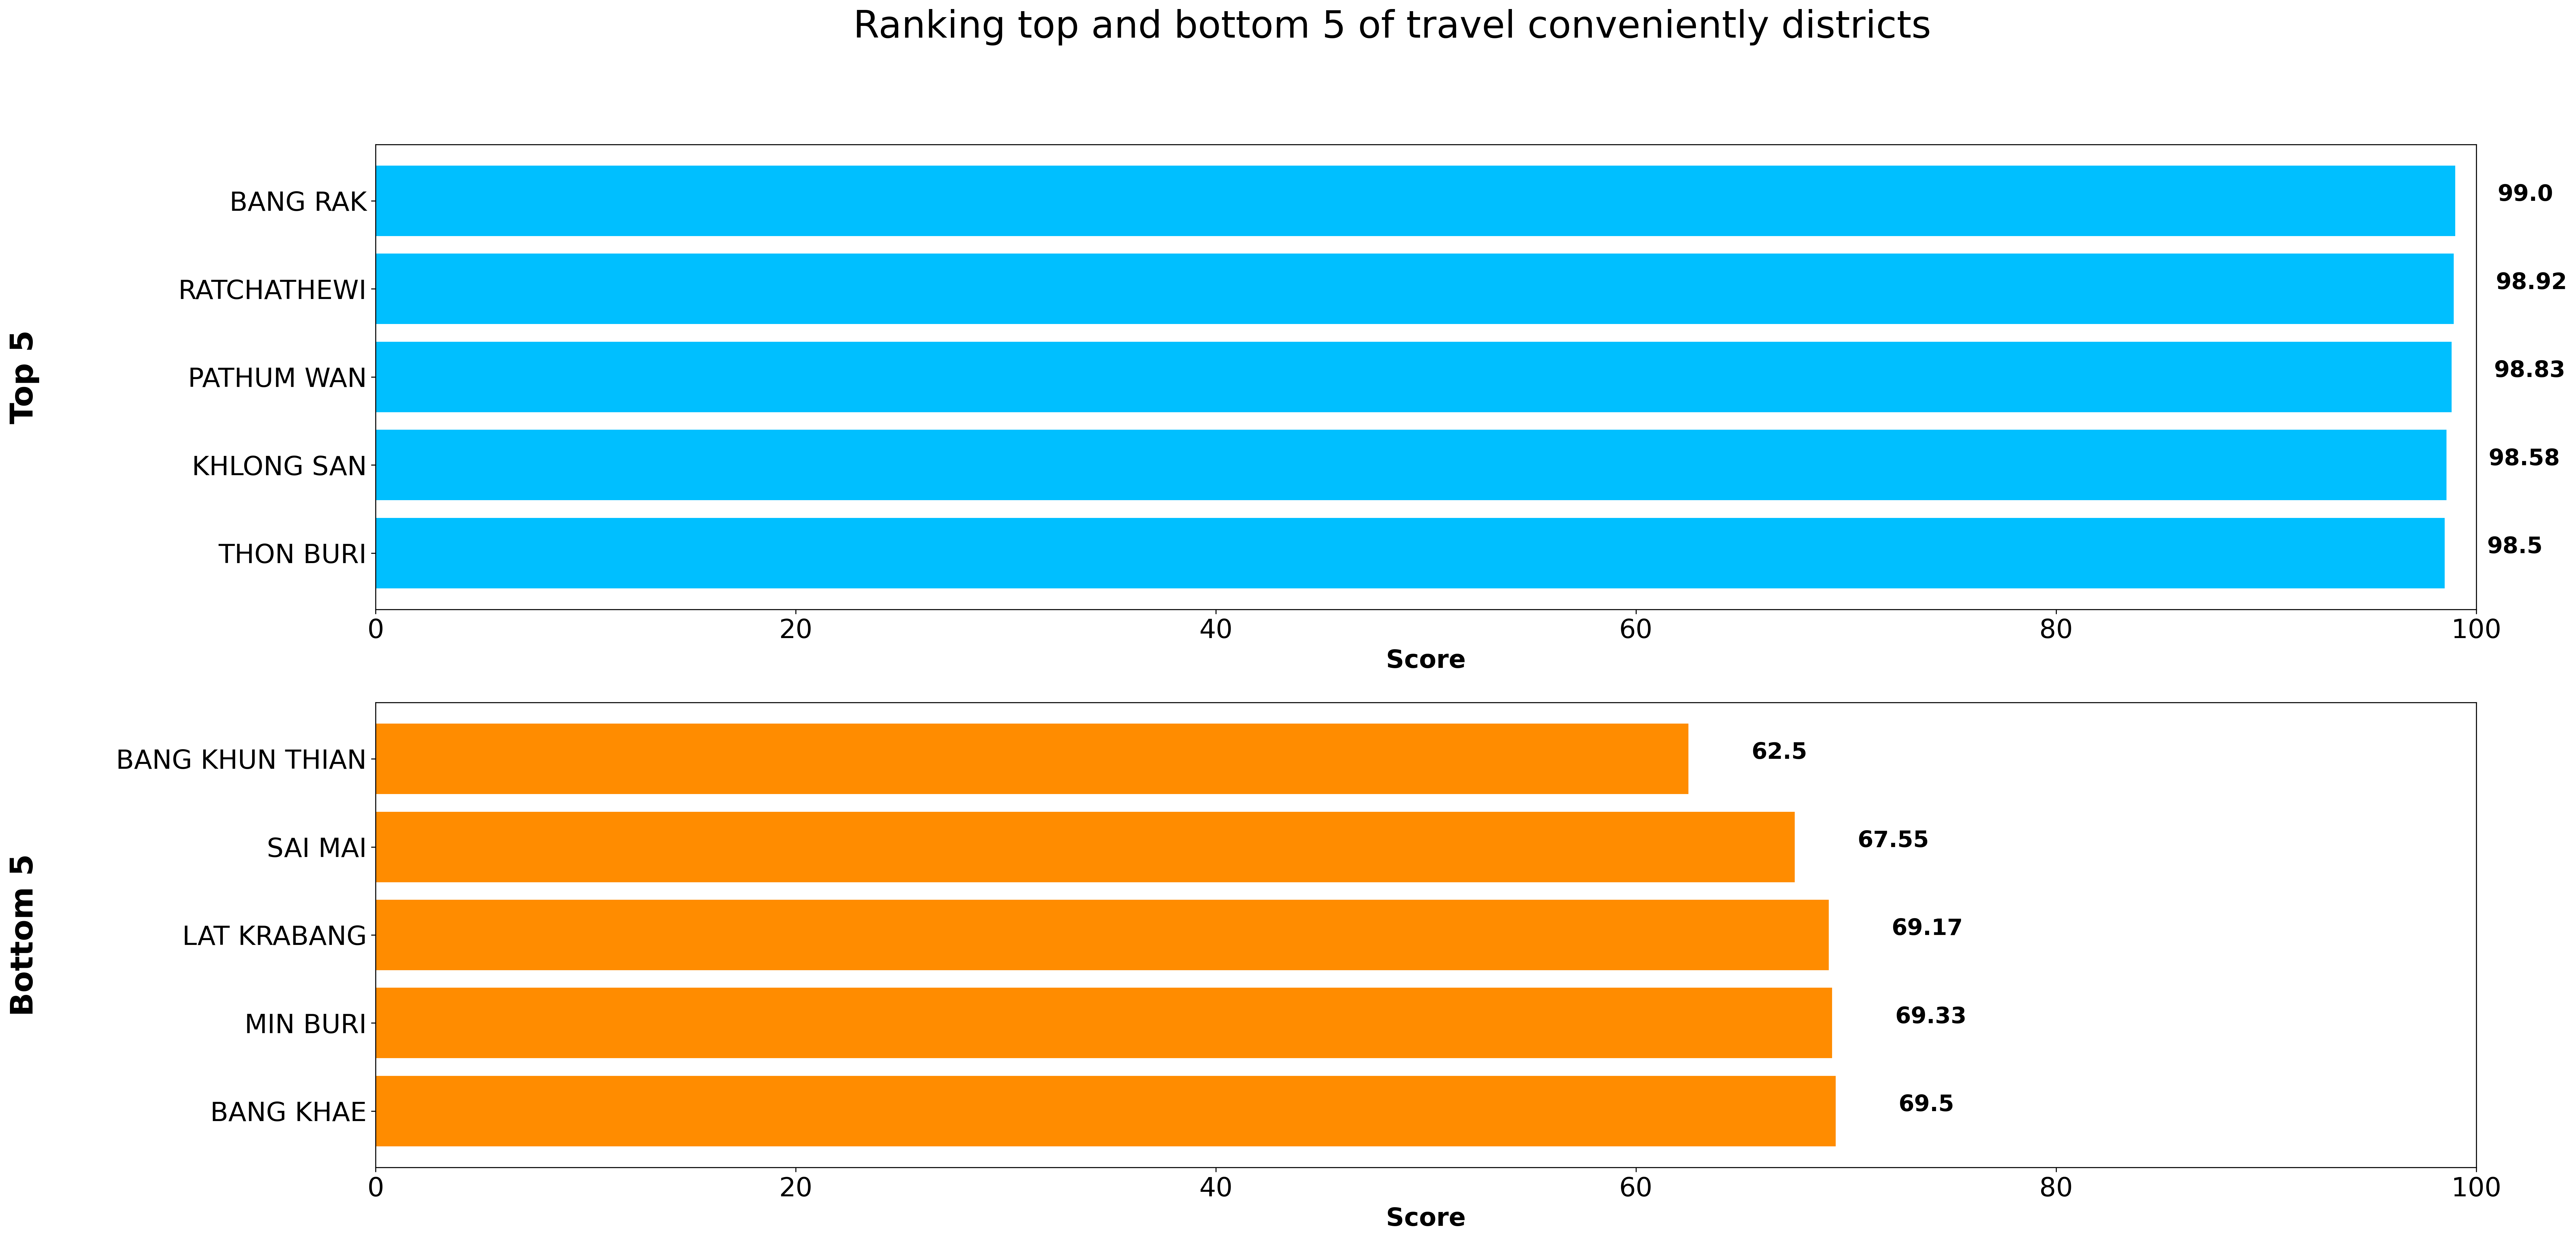

In [134]:
top_5_travel = top_5_travel.iloc[:5,:].sort_values(by = 'mean_travel' ,ascending = True).reset_index(drop = True)
fig, axs = plt.subplots(2, figsize = (30,15), dpi = 300)
fig.suptitle('Ranking top and bottom 5 of travel conveniently districts', fontsize = 30)
axs[0].set_xticklabels([0,20,40,60,80,100],fontsize=21)
axs[0].set_yticklabels(top_5_travel['district_name_en'],fontsize=21)
axs[0].barh(top_5_travel['district_name_en'], top_5_travel['mean_travel'], color = 'deepskyblue')
axs[0].set_xlim([0, 100])
for i, v in enumerate(top_5_travel['mean_travel'].round(2)):
    axs[0].text(v +2 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[0].set_ylabel('Top 5', fontsize=25, fontweight='bold')
axs[0].set_xlabel('Score', fontsize=20, fontweight='bold')
axs[0].yaxis.set_label_coords(-0.16, 0.5)

bottom_5_travel = bottom_5_travel.iloc[:5,:].sort_values(by = 'mean_travel' ,ascending = False).reset_index(drop = True)
axs[1].barh(bottom_5_travel['district_name_en'], bottom_5_travel['mean_travel'])
axs[1].set_xlim([0, 100])
axs[1].set_xticklabels([0,20,40,60,80,100],fontsize=21)
axs[1].set_yticklabels(bottom_5_travel['district_name_en'],fontsize=21)
axs[1].barh(bottom_5_travel['district_name_en'], bottom_5_travel['mean_travel'], color = 'darkorange')
axs[1].set_xlim([0, 100])
for i, v in enumerate(bottom_5_travel['mean_travel'].round(2)):
    axs[1].text(v +3 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[1].set_ylabel('Bottom 5', fontsize=25, fontweight='bold')
axs[1].set_xlabel('Score', fontsize=20, fontweight='bold')
axs[1].yaxis.set_label_coords(-0.16, 0.5)

#plt.savefig("top_travel.png")
#files.download("top_travel.png") 

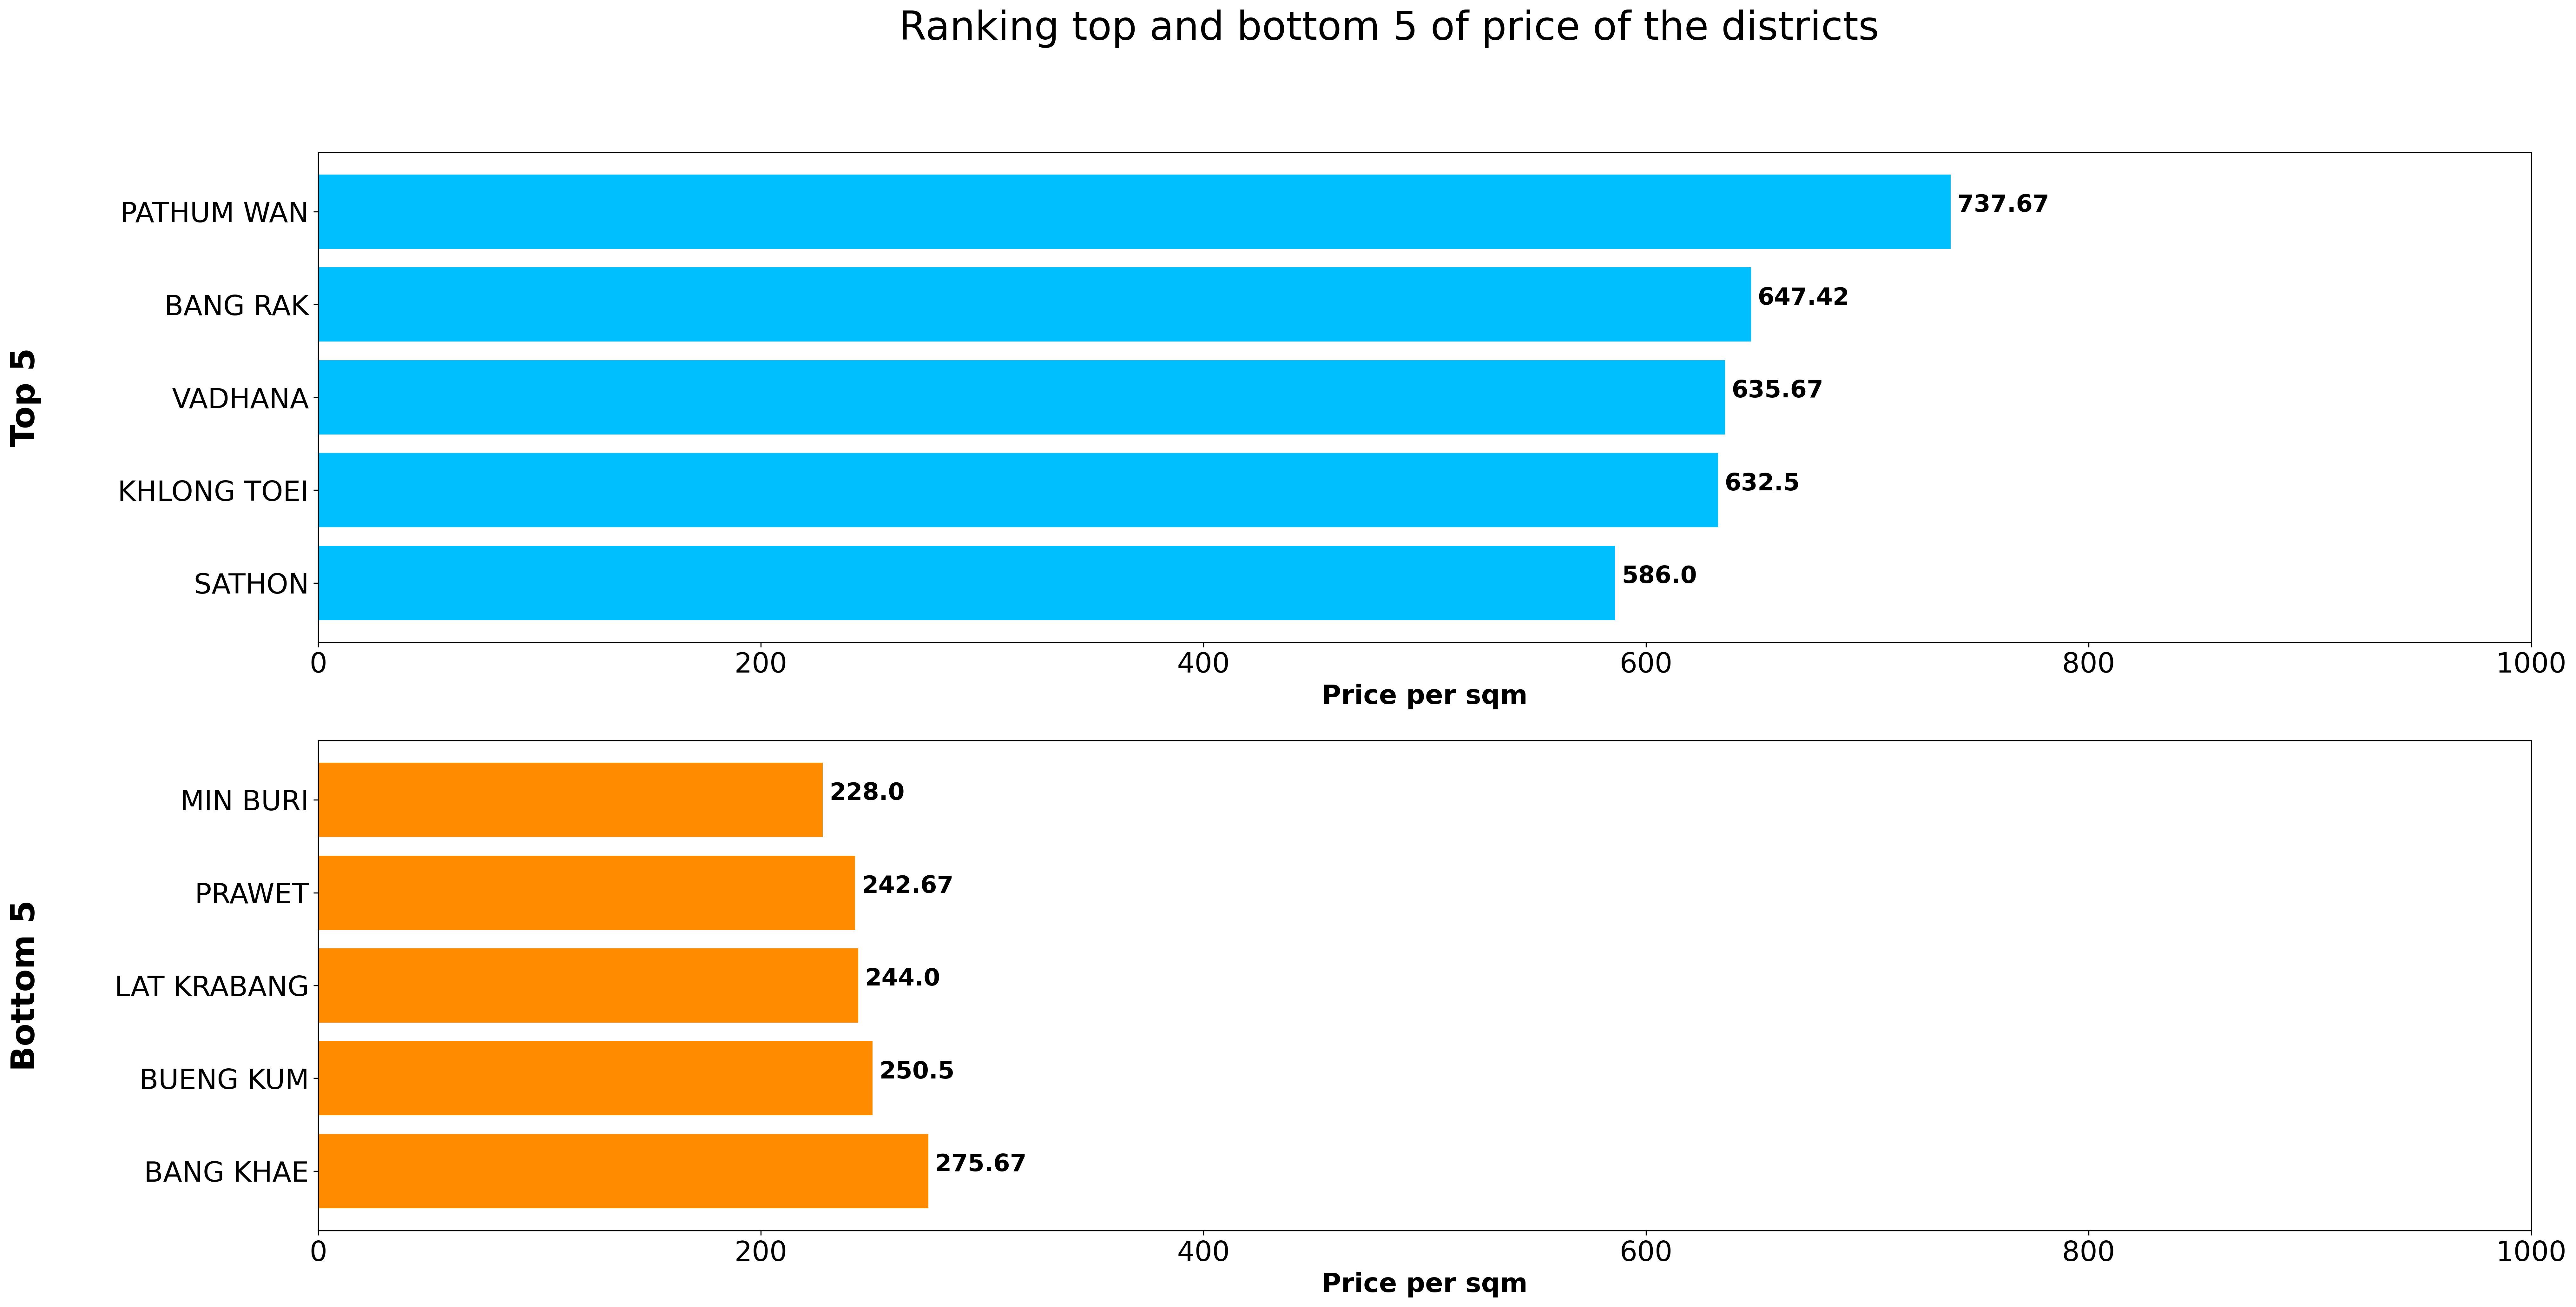

In [135]:
top_5_price = top_5_price.iloc[:5,:].sort_values(by = 'mean_median_rent_price_sqm_district(2021)' ,ascending = True).reset_index(drop = True)
fig, axs = plt.subplots(2, figsize = (30,15), dpi = 300)
fig.suptitle('Ranking top and bottom 5 of price of the districts', fontsize = 30)
axs[0].set_xticklabels([0,200,400,600,800,1000],fontsize=21)
axs[0].set_yticklabels(top_5_price['district_name_en'],fontsize=21)
axs[0].barh(top_5_price['district_name_en'], top_5_price['mean_median_rent_price_sqm_district(2021)'], color = 'deepskyblue')
axs[0].set_xlim([0, 1000])
for i, v in enumerate(top_5_price['mean_median_rent_price_sqm_district(2021)'].round(2)):
    axs[0].text(v +3 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[0].set_ylabel('Top 5', fontsize=25, fontweight='bold')
axs[0].set_xlabel('Price per sqm', fontsize=20, fontweight='bold')
axs[0].yaxis.set_label_coords(-0.125, 0.5)

bottom_5_price = bottom_5_price.iloc[:5,:].sort_values(by = 'mean_median_rent_price_sqm_district(2021)' ,ascending = False).reset_index(drop = True)
axs[1].barh(bottom_5_price['district_name_en'], bottom_5_price['mean_median_rent_price_sqm_district(2021)'])
axs[1].set_xlim([0, 100])
axs[1].set_xticklabels([0,200,400,600,800,1000],fontsize=21)
axs[1].set_yticklabels(bottom_5_price['district_name_en'],fontsize=21)
axs[1].barh(bottom_5_price['district_name_en'], bottom_5_price['mean_median_rent_price_sqm_district(2021)'], color = 'darkorange')
axs[1].set_xlim([0, 1000])
for i, v in enumerate(bottom_5_price['mean_median_rent_price_sqm_district(2021)'].round(2)):
    axs[1].text(v +3 , i , v, color='black', fontweight='bold',fontsize = 18)
axs[1].set_ylabel('Bottom 5', fontsize=25, fontweight='bold')
axs[1].set_xlabel('Price per sqm', fontsize=20, fontweight='bold')
axs[1].yaxis.set_label_coords(-0.125, 0.5)

#plt.savefig("top_price.png")
#files.download("top_price.png") 